In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import seaborn as sns

In [2]:
dataset_csv_file_path = r"../data/dataset.csv"
df = pd.read_csv(dataset_csv_file_path)

## Generic Dataset & Features Understanding

In [3]:
df.shape

(9069, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            9069 non-null   object 
 1   no_of_adults                          9069 non-null   int64  
 2   no_of_children                        9069 non-null   int64  
 3   no_of_weekend_nights                  9069 non-null   int64  
 4   no_of_week_nights                     9069 non-null   int64  
 5   type_of_meal_plan                     9069 non-null   object 
 6   required_car_parking_space            9069 non-null   int64  
 7   room_type_reserved                    9069 non-null   object 
 8   lead_time                             9069 non-null   int64  
 9   arrival_year                          9069 non-null   int64  
 10  arrival_month                         9069 non-null   int64  
 11  arrival_date     

In [5]:
any(df.isnull().sum())

False

In [6]:
any(df.duplicated())

False

In [7]:
df.sample(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
8498,INN00434,2,0,0,3,Meal Plan 1,0,Room_Type 1,10,2017,10,20,Online,0,0,0,126.0,1,Not_Canceled
4618,INN30830,2,0,1,1,Meal Plan 1,0,Room_Type 1,31,2018,10,15,Offline,0,0,0,85.0,0,Not_Canceled
7975,INN24517,2,0,0,2,Meal Plan 2,0,Room_Type 1,74,2017,9,18,Offline,0,0,0,101.5,0,Not_Canceled
6908,INN35008,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2018,3,18,Offline,0,0,0,64.4,0,Not_Canceled
1696,INN20616,2,0,1,1,Meal Plan 1,0,Room_Type 1,101,2018,4,9,Online,0,0,0,96.3,1,Canceled


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,9069,9069,INN26826,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,9069.0,NaN,NaN,NaN,1.841328,0.516669,0.0,2.0,2.0,2.0,4.0
no_of_children,9069.0,NaN,NaN,NaN,0.106627,0.412087,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,9069.0,NaN,NaN,NaN,0.812438,0.876968,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,9069.0,NaN,NaN,NaN,2.209725,1.451202,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,9069,4,Meal Plan 1,6968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,9069.0,NaN,NaN,NaN,0.030213,0.171182,0.0,0.0,0.0,0.0,1.0
room_type_reserved,9069,7,Room_Type 1,7068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,9069.0,NaN,NaN,NaN,85.146323,86.367994,0.0,17.0,56.0,127.0,443.0
arrival_year,9069.0,NaN,NaN,NaN,2017.812328,0.390472,2017.0,2018.0,2018.0,2018.0,2018.0


In [9]:
categorical_features = [ 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status',
    'arrival_year', 'arrival_month', 'arrival_date', 'required_car_parking_space', 'repeated_guest']


numerical_features = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
    'lead_time',
    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests']



In [10]:
# Repetitive but I like to look at the data again sometimes lol
df[numerical_features].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000,9069.000000
mean,1.841328,0.106627,0.812438,2.209725,85.146323,0.027566,0.164627,103.264462,0.627302
std,0.516669,0.412087,0.876968,1.451202,86.367994,0.420723,1.961844,35.044192,0.781081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,56.000000,0.000000,0.000000,99.330000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,127.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,13.000000,58.000000,540.000000,5.000000


In [11]:
# Viewing the different values in categorical features so I can spot potential future challenges early on
categorical_values_summary = {feature: sorted(df[feature].unique().tolist()) for feature in categorical_features}
# pprint(categorical_values_summary)

## Early Conclusions

1. The data is pretty much a preprocessed and cleaned dataset, and most likely is used for educational purposes.
2. All features are clear but two columns have some sort of uncertainty: [type_of_meal_plan, room_type_reserved]

Before diving into Micro analysis, I am a bit bothered by meal and room types, yet I believe we can make some assumptions about these when associating them with other features.

In [12]:
# We will start with the meal plans.
# The distribution as we can see is heavily biased, and meal plan 3 is not represented at all  (one record only)
df.type_of_meal_plan.value_counts() * 100 /len(df)

type_of_meal_plan
Meal Plan 1     76.833168
Not Selected    14.566104
Meal Plan 2      8.589701
Meal Plan 3      0.011027
Name: count, dtype: float64

My hypothesis is that the most selected meal plan (Meal Plan 1) in this case, will be the breakfast deal, and other meal plans
will be more expensive, either more meals are included, or better cuisine. In order to somewhat test this hypothesis without spending a lot of time since it might not be the most relevant feature for our goal, I will try to associate it with the cost/price of the booking.

Of couse, we need to normalize the pricing based on number of people and days booked, and will test it in different months/seasons.

Further advanced and more accurate measures can be used, but it is unnecessay in our use-case, or at least not the in these early stages.

In [13]:
total_guests = df['no_of_adults'] + df['no_of_children']
total_nights = df['no_of_weekend_nights'] + df['no_of_week_nights']

In [14]:
# adding small number to avoid dividing on Zero 
small_number = 0.0001
avg_price_per_person_per_night = df['avg_price_per_room'] / (total_guests) / (total_nights + small_number)

In [15]:
subset = df[['arrival_month', 'type_of_meal_plan']].copy()
subset["avg_price_per_person_per_night"] = avg_price_per_person_per_night
meals_of_interest = {'Meal Plan 1', 'Meal Plan 2', 'Not Selected'}
monthly_normalized_prices = subset[subset.type_of_meal_plan.isin(meals_of_interest)].groupby(['arrival_month', 'type_of_meal_plan'])['avg_price_per_person_per_night'].mean().unstack()

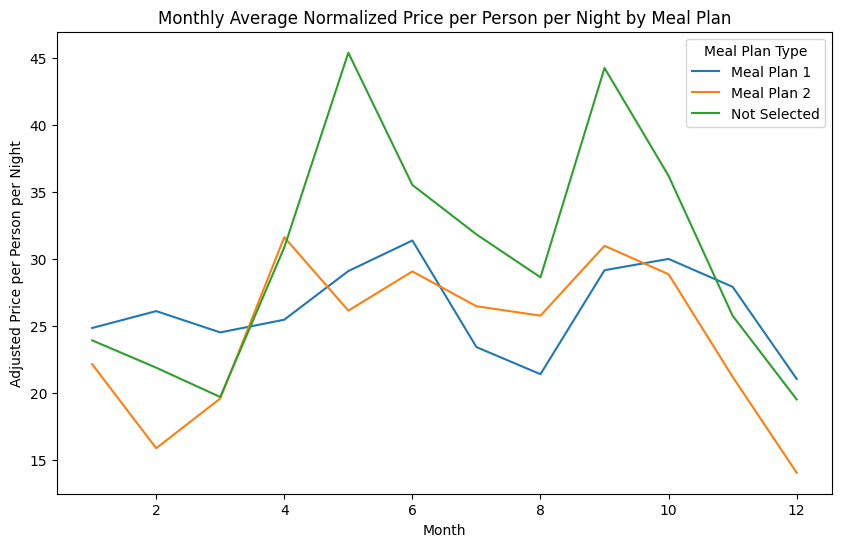

In [16]:
monthly_normalized_prices.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Average Normalized Price per Person per Night by Meal Plan')
plt.xlabel('Month')
plt.ylabel('Adjusted Price per Person per Night')
plt.legend(title="Meal Plan Type")
plt.show()

From the plot above, we cannot really confirm or completely deny the hypothesis, but one interesting thing that we can see here, is that people who do not select a meal plan, generally spend more money on their rooms, which can give an interesting feedback about the customers behavior

In [17]:
# Now moving to the room types
# We can obviously see, that room type 1 and room type 4 are the most reserved by a huge margin, and room type 1 is the most popular
df.room_type_reserved.value_counts() * 100 /len(df)

room_type_reserved
Room_Type 1    77.935825
Room_Type 4    16.451648
Room_Type 6     2.635351
Room_Type 2     1.885544
Room_Type 5     0.661594
Room_Type 7     0.419010
Room_Type 3     0.011027
Name: count, dtype: float64

In [18]:
subset = df[['arrival_month', 'room_type_reserved']].copy()
subset["avg_price_per_person_per_night"] = avg_price_per_person_per_night
subset["total_guests"] = total_guests

rooms_of_interest = {'Room_Type 1', 'Room_Type 4', 'Room_Type 6'}

monthly_room_prices = subset[subset.room_type_reserved.isin(rooms_of_interest)].groupby(['arrival_month', 'room_type_reserved'])['avg_price_per_person_per_night'].mean().unstack()

In [19]:
subset.groupby("room_type_reserved")["total_guests"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type_reserved,,,,,,,,
Room_Type 1,7068.0,1.819327,0.525598,1.0,2.0,2.0,2.0,4.0
Room_Type 2,171.0,2.163743,0.591186,1.0,2.0,2.0,2.0,4.0
Room_Type 3,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
Room_Type 4,1492.0,2.223190,0.656535,1.0,2.0,2.0,3.0,12.0
Room_Type 5,60.0,1.850000,0.732421,1.0,1.0,2.0,2.0,4.0
Room_Type 6,239.0,3.732218,0.637952,1.0,4.0,4.0,4.0,5.0
Room_Type 7,38.0,3.026316,1.173741,1.0,2.0,3.0,4.0,5.0


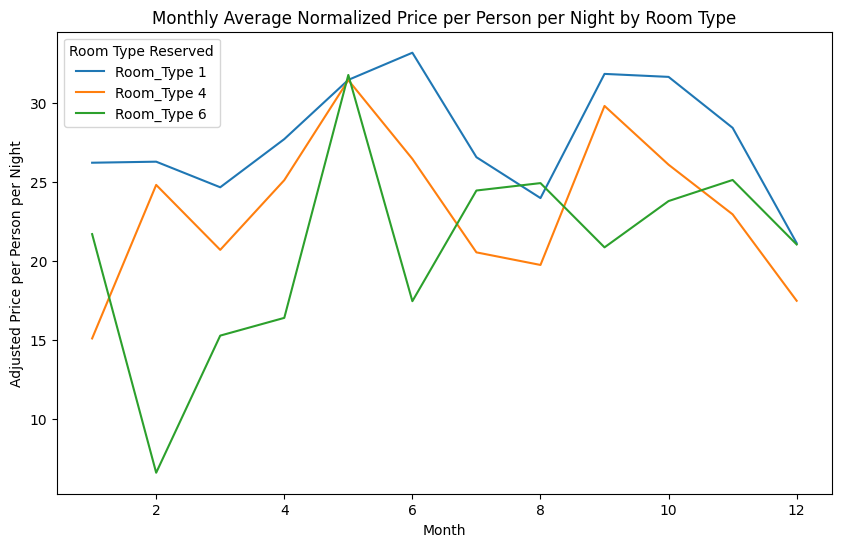

In [20]:
# Plotting monthly average normalized price per person per night by room type
plt.figure(figsize=(10, 6))
monthly_room_prices.plot(kind='line', ax=plt.gca())
plt.title('Monthly Average Normalized Price per Person per Night by Room Type')
plt.xlabel('Month')
plt.ylabel('Adjusted Price per Person per Night')
plt.legend(title="Room Type Reserved")
plt.show()

Nothing much to gain without further analysis, but what we can see is that Room 1 is mainly for either single or couple reservations, while room 4 tend to be for more people. In further micro-analysis we can see the relationship of this and having children, since it might associated.


## Features Micro Analysis
Here we will breakdown each feature, analyze and visualize it, while also looking and its relationship with other relevant features too.

### Some feature engineering for further analysis 

In [21]:
# Engineered features to be calculated

# has_children (whether the reservation had children or not)
# stay_duration (week nights + weekend nights)
# total_guests (no_of_adults + no_of_children)
# arrival_datetime (date time object that includes the date, month, and year)
# arrival_day_name (Name of the day, e.g. Monday, Friday, etc.)
# reservation_datetime ( from the arrival datetime, estimate the reservation date using the lead_time factor)
# previous_reservation ('no_of_previous_cancellations' + 'no_of_previous_bookings_not_canceled' if repeated guest)

In [22]:
df['has_children'] = df.no_of_children.apply(bool)

df['total_nights'] = df['no_of_week_nights'] + df['no_of_weekend_nights']

df['total_guests'] = df['no_of_adults'] + df['no_of_children']

In [23]:
# Very important note here, is that it one of the month exceeded the range, so we will inspect that after the other features engineering
df['arrival_datetime'] = pd.to_datetime(df[['arrival_year', 'arrival_month', 'arrival_date']].rename(
    columns={'arrival_year': 'year', 'arrival_month': 'month', 'arrival_date': 'day'}), errors='coerce')

In [24]:
df['reservation_datetime'] = df['arrival_datetime'] - pd.to_timedelta(df['lead_time'], unit='D')

In [25]:
df['no_previous_reservations'] = df.apply(
    lambda row: row['no_of_previous_cancellations'] + row['no_of_previous_bookings_not_canceled'] 
    if bool(row['repeated_guest']) else 0, axis=1
)

##### We will deviate a bit to look further into some arrival date-time cases

In [26]:
df.arrival_date.max()

np.int64(31)

In [27]:
df[df.arrival_datetime.isna()].arrival_month.value_counts()

arrival_month
2    8
Name: count, dtype: int64

In [28]:
df[df.arrival_datetime.isna()].booking_status.value_counts()

booking_status
Not_Canceled    6
Canceled        2
Name: count, dtype: int64

This makes me doubt the credibility of the data, since some bookings were made for non-existing dates, yet the booking wasn't cancelled.
So for now I will drop these bookings, since it toxicates the data and just holds 8 out of 9k bookings

In [29]:
df = df.dropna(subset="arrival_datetime").sort_values(by="arrival_datetime").reset_index(drop=True)

In [30]:
df['arrival_day_name'] =  df['arrival_datetime'].dt.day_name()

In [31]:
engineered_columns = ['has_children', 'total_nights', 'total_guests', 'arrival_datetime',
       'reservation_datetime', 'no_previous_reservations', 'arrival_day_name']

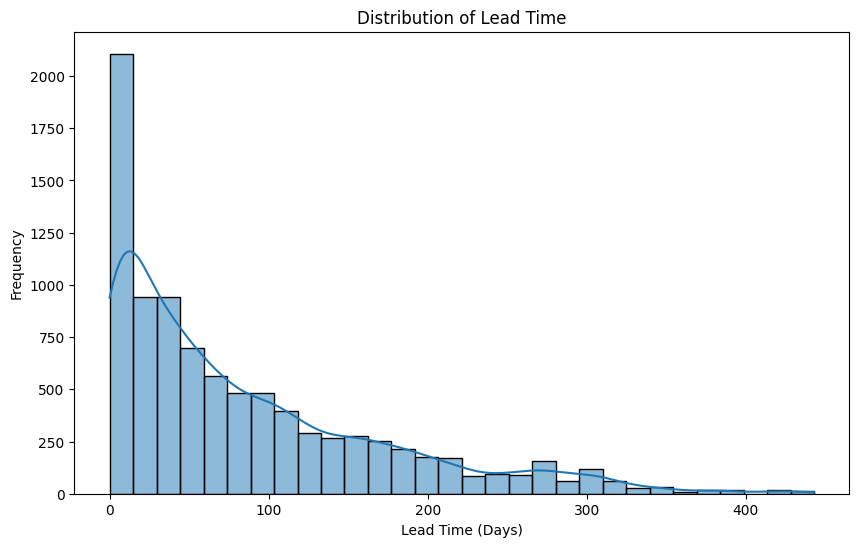

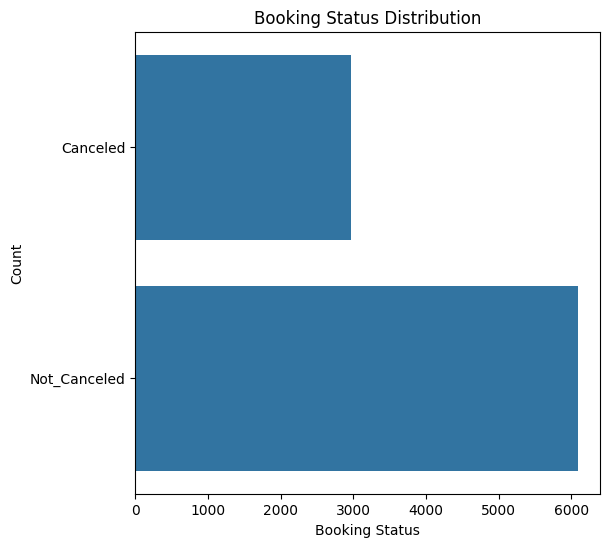

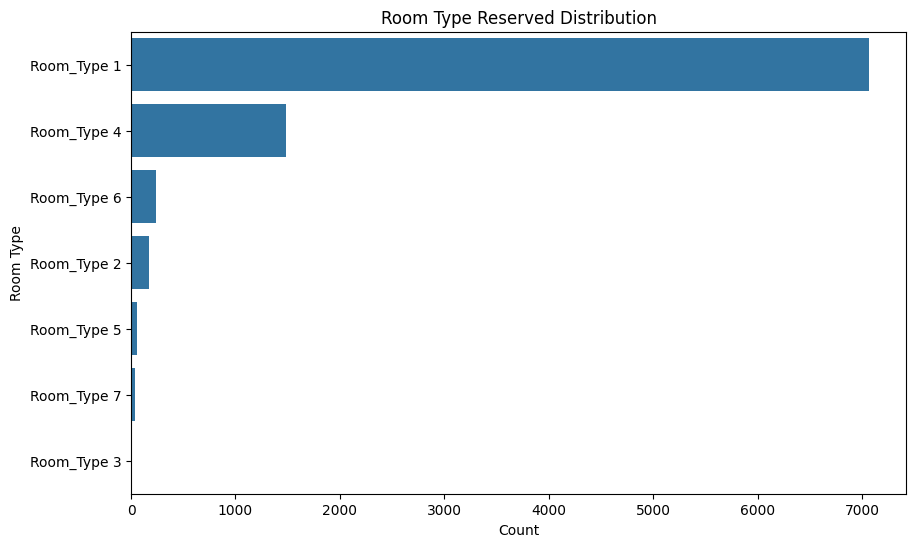

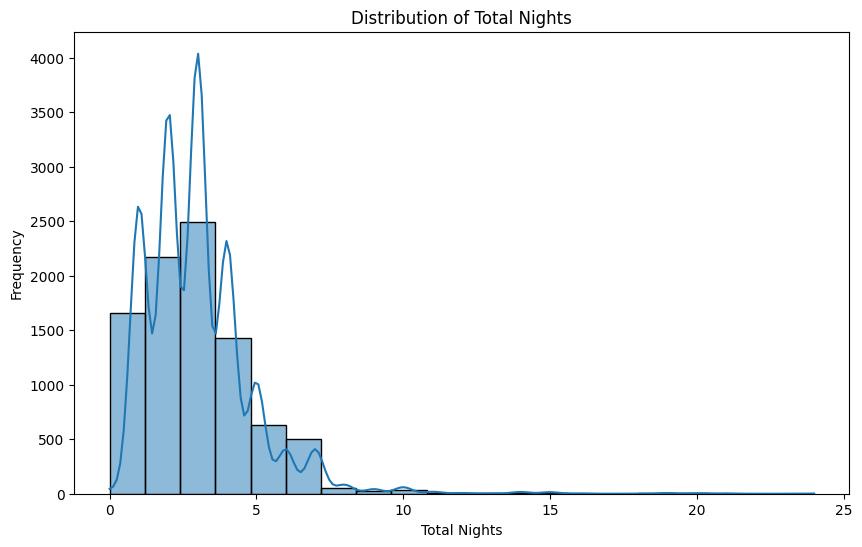

In [32]:
# Generic EDA

# Plot distribution of lead time
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], kde=True, bins=30)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()


# Plot booking status distribution
plt.figure(figsize=(6, 6))
sns.countplot(df['booking_status'])
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()

# Count plot for room types reserved
plt.figure(figsize=(10, 6))
sns.countplot(y='room_type_reserved', data=df, order=df['room_type_reserved'].value_counts().index)
plt.title('Room Type Reserved Distribution')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()

# Distribution of total nights
plt.figure(figsize=(10, 6))
sns.histplot(df['total_nights'], kde=True, bins=20)
plt.title('Distribution of Total Nights')
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.show()


##### Back to the Micro-Analysis

## Having Children

In [33]:
percent_with_children = (df['has_children'].mean()) * 100

cancellation_with_children = df.groupby('has_children')['booking_status'].value_counts(normalize=True).unstack().fillna(0)
cancellation_with_children = cancellation_with_children.reset_index()


children_vs_weekend = df.groupby('has_children')['no_of_weekend_nights'].mean()

children_vs_meal_plan = df.groupby(['has_children', 'type_of_meal_plan']).size().unstack().fillna(0)

children_vs_parking = df.groupby('has_children')['required_car_parking_space'].mean()

children_reservation_months = df[df['has_children'] == 1]['arrival_month'].value_counts(normalize=True)

avg_nights_with_children = df[df['has_children'] == 1]['total_nights'].mean()

small_number = 0.0001
df['avg_price_per_person_per_night'] = df['avg_price_per_room'] / (df['total_guests']) / (df['total_nights'] + small_number)
price_comparison = df.groupby(['has_children', 'arrival_month'])['avg_price_per_person_per_night'].mean().unstack()

In [34]:
children_vs_weekend

has_children
False    0.805840
True     0.892697
Name: no_of_weekend_nights, dtype: float64

In [35]:
children_vs_parking

has_children
False    0.028010
True     0.055142
Name: required_car_parking_space, dtype: float64

In [36]:
avg_nights_with_children - df[~df['has_children']]['total_nights'].mean()

np.float64(0.1917162401482142)

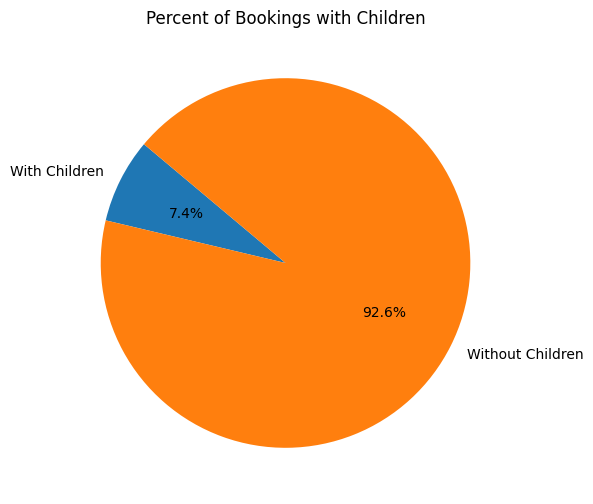

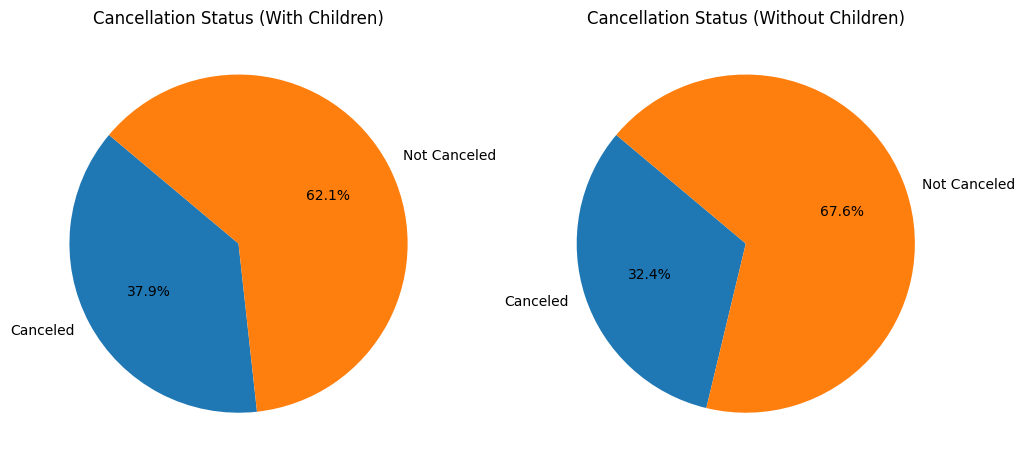

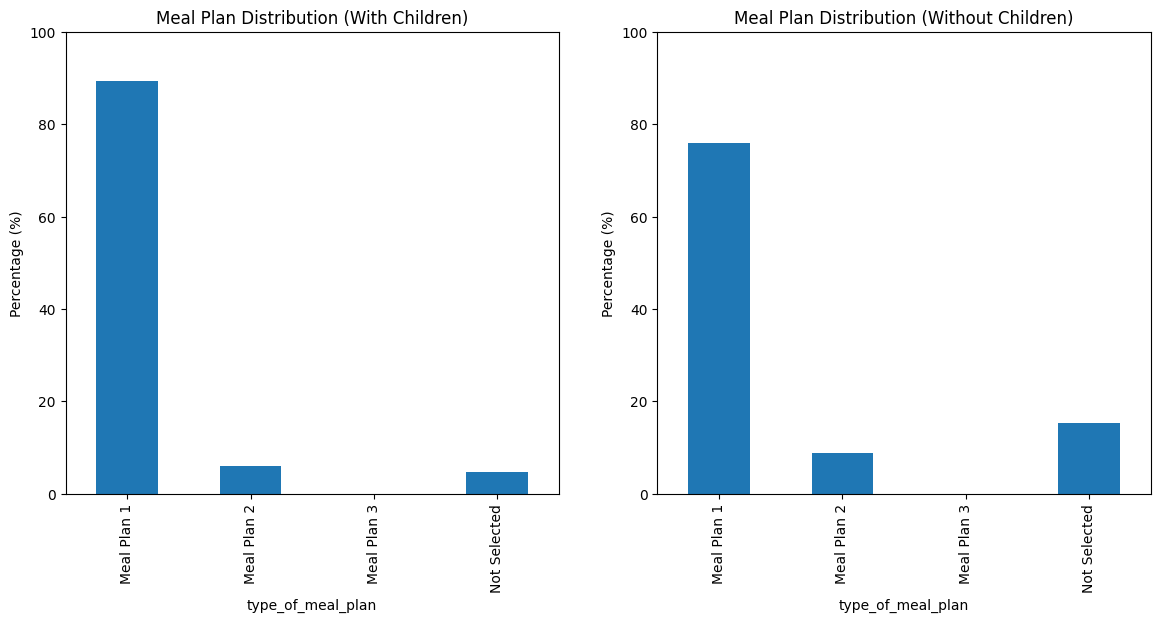

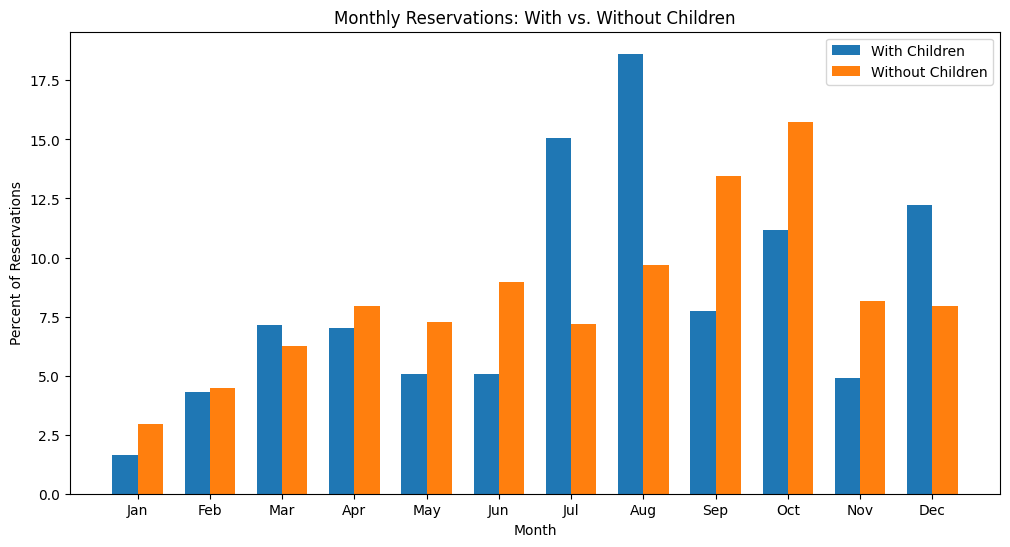

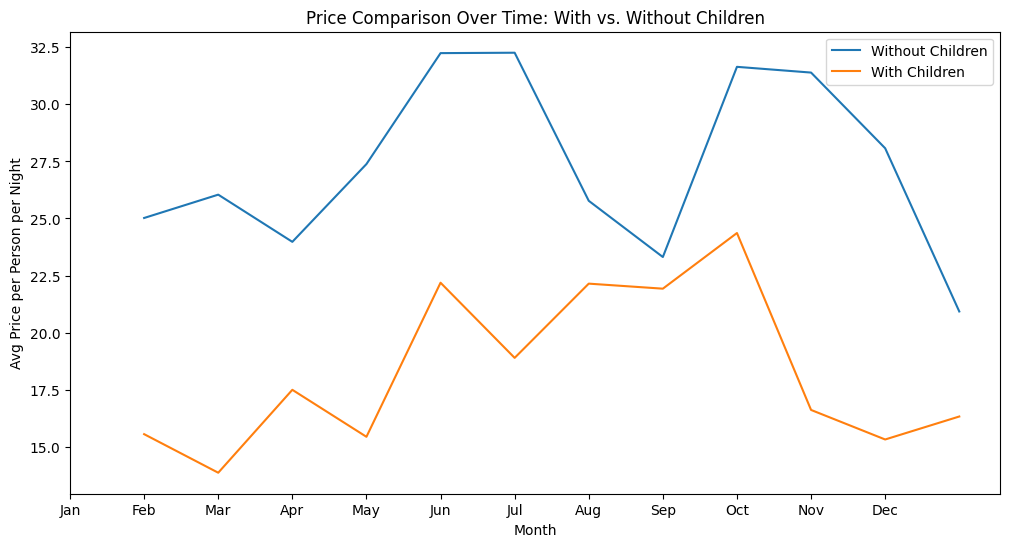

In [37]:
# Mostly AI Generated 

plt.figure(figsize=(6, 6))
labels = ['With Children', 'Without Children']
sizes = [percent_with_children, 100 - percent_with_children]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percent of Bookings with Children')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
statuses = ['Canceled', 'Not Canceled']
sizes_children = cancellation_with_children.loc[1] * 100
axes[0].pie(sizes_children.iloc[1:], labels=statuses, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Cancellation Status (With Children)')

sizes_no_children = cancellation_with_children.loc[0] * 100
axes[1].pie(sizes_no_children.iloc[1:], labels=statuses, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Cancellation Status (Without Children)')

# 3. Association with Meal Plans - Bar Charts Side by Side
meal_plans_percent = children_vs_meal_plan.div(children_vs_meal_plan.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# With Children
meal_plans_percent.iloc[1].plot(kind='bar', ax=axes[0])
axes[0].set_title('Meal Plan Distribution (With Children)')
axes[0].set_ylabel('Percentage (%)')
axes[0].set_ylim(0, 100)

# Without Children
meal_plans_percent.iloc[0].plot(kind='bar', ax=axes[1])
axes[1].set_title('Meal Plan Distribution (Without Children)')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_ylim(0, 100)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

months_with_children = df[df['has_children'] == 1]['arrival_month'].value_counts().reindex(range(1,13), fill_value=0)
months_without_children = df[df['has_children'] == 0]['arrival_month'].value_counts().reindex(range(1,13), fill_value=0)
total_with_children = months_with_children.sum()
total_without_children = months_without_children.sum()
months_with_children_percent = (months_with_children / total_with_children) * 100
months_without_children_percent = (months_without_children / total_without_children) * 100


fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
ax.bar(np.arange(len(month_names)) - width/2, months_with_children_percent, width=width, label='With Children')
ax.bar(np.arange(len(month_names)) + width/2, months_without_children_percent, width=width, label='Without Children')

ax.set_xticks(np.arange(len(month_names)))
ax.set_xticklabels(month_names)
ax.set_xlabel('Month')
ax.set_ylabel('Percent of Reservations')
ax.set_title('Monthly Reservations: With vs. Without Children')
ax.legend()

fig, ax = plt.subplots(figsize=(12, 6))
price_comparison.T.plot(ax=ax)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(month_names)
ax.set_xlabel('Month')
ax.set_ylabel('Avg Price per Person per Night')
ax.set_title('Price Comparison Over Time: With vs. Without Children')
ax.legend(['Without Children', 'With Children'])

plt.show()

## Number of Adults

In [38]:
adults_distribution = df['no_of_adults'].value_counts(normalize=True).mul(100).round(2)
adults_counts = df['no_of_adults'].value_counts()

cancellation_rate_by_adults = df.groupby('no_of_adults')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)

avg_nights_by_adults = df.groupby('no_of_adults')['total_nights'].mean()

no_adults_analysis_results = {
    "Adults Distribution Percentage": adults_distribution,
    "Adults Count": adults_counts,
    "Cancellation Rate by Adults": cancellation_rate_by_adults,
    "Average Total Nights by Adults": avg_nights_by_adults
}

In [39]:
# Here am interested in studying the case in which we have 0 adults. will dive deeper into it
# pprint(no_adults_analysis_results)

In [40]:
df[df['no_of_adults'] == 0].has_children.value_counts()

has_children
True    34
Name: count, dtype: int64

Here we can see that some reservattions have no adults and only children

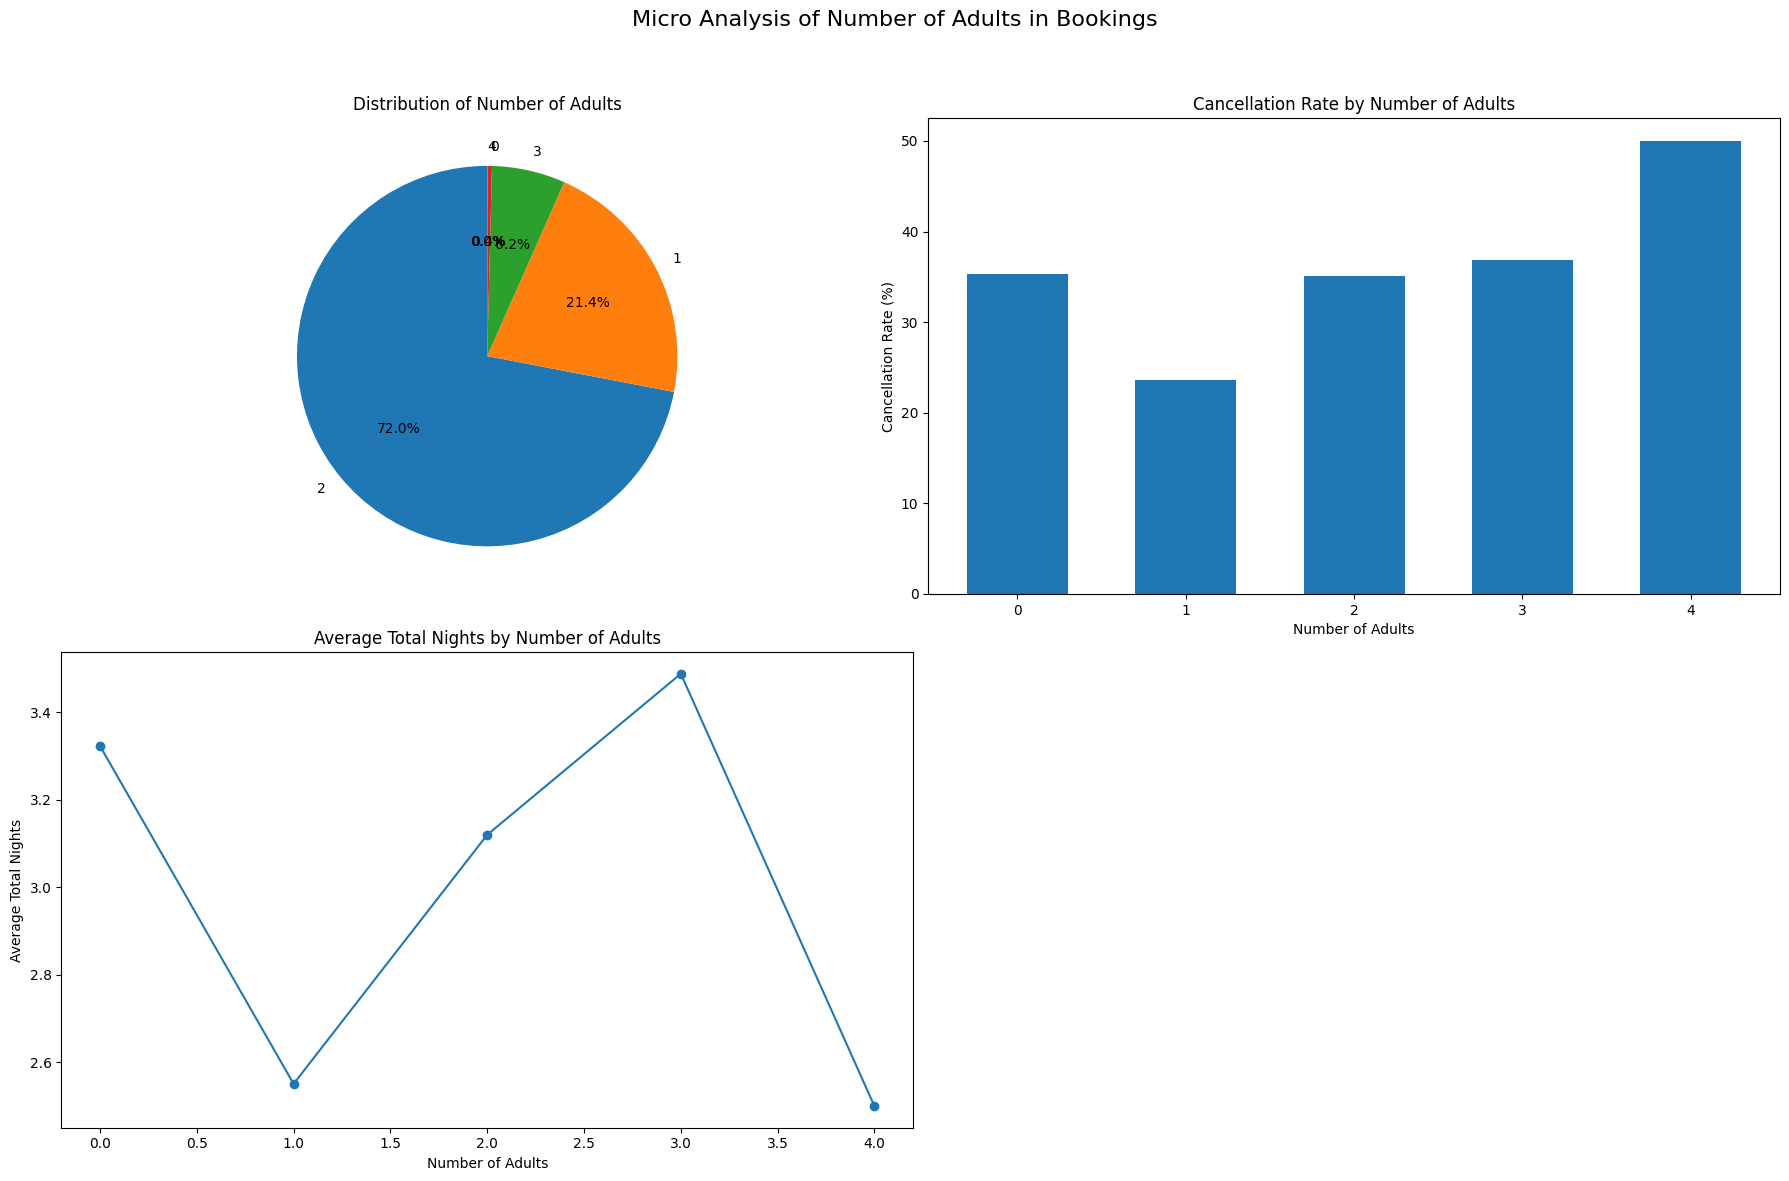

In [41]:
# Mostly AI Generated 

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Micro Analysis of Number of Adults in Bookings', fontsize=16)

axes[0, 0].pie(adults_distribution, labels=adults_distribution.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution of Number of Adults')

axes[0, 1].bar(cancellation_rate_by_adults.index, cancellation_rate_by_adults, width=0.6)
axes[0, 1].set_title('Cancellation Rate by Number of Adults')
axes[0, 1].set_xlabel('Number of Adults')
axes[0, 1].set_ylabel('Cancellation Rate (%)')
# 3. Line Chart for Average Total Nights by Number of Adults (Bottom, spanning two columns)
axes[1, 0].plot(avg_nights_by_adults.index, avg_nights_by_adults, marker='o')
axes[1, 0].set_title('Average Total Nights by Number of Adults')
axes[1, 0].set_xlabel('Number of Adults')
axes[1, 0].set_ylabel('Average Total Nights')
# Hide the empty subplot
axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title space
plt.show()


## 

## Week & Weekend nights analysis

In [42]:
weekend_nights_by_month = df.groupby('arrival_month')['no_of_weekend_nights'].mean()

weekend_nights_with_children = df.groupby('has_children')['no_of_weekend_nights'].mean()

weekend_week_nights_correlation = df['no_of_weekend_nights'].corr(df['no_of_week_nights'])

cancellation_rate_by_weekend_nights = df.groupby('no_of_weekend_nights')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)

week_nights_by_month = df.groupby('arrival_month')['no_of_week_nights'].mean()

week_nights_with_children = df.groupby('has_children')['no_of_week_nights'].mean()

cancellation_rate_by_week_nights = df.groupby('no_of_week_nights')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)


only_week_nights_price = df[df['no_of_weekend_nights'] == 0]['avg_price_per_person_per_night'].mean()
only_weekend_nights_price = df[df['no_of_week_nights'] == 0]['avg_price_per_person_per_night'].mean()


price_by_weekend_and_week_nights = df.groupby(['no_of_weekend_nights', 'no_of_week_nights'])['avg_price_per_person_per_night'].mean()

week_days_analysis_results = {
    "Weekend Nights by Month": weekend_nights_by_month,
    "Weekend Nights with Children": weekend_nights_with_children,
    "Weekend-Week Nights Correlation": weekend_week_nights_correlation,
    "Cancellation Rate by Weekend Nights": cancellation_rate_by_weekend_nights,
    "Week Nights by Month": week_nights_by_month,
    "Week Nights with Children": week_nights_with_children,
    "Cancellation Rate by Week Nights": cancellation_rate_by_week_nights,
    "Only Week Nights Price": only_week_nights_price,
    "Only Weekend Nights Price": only_weekend_nights_price,
    "Price by Weekend and Week Nights": price_by_weekend_and_week_nights
}

In [43]:
# pprint(week_days_analysis_results)

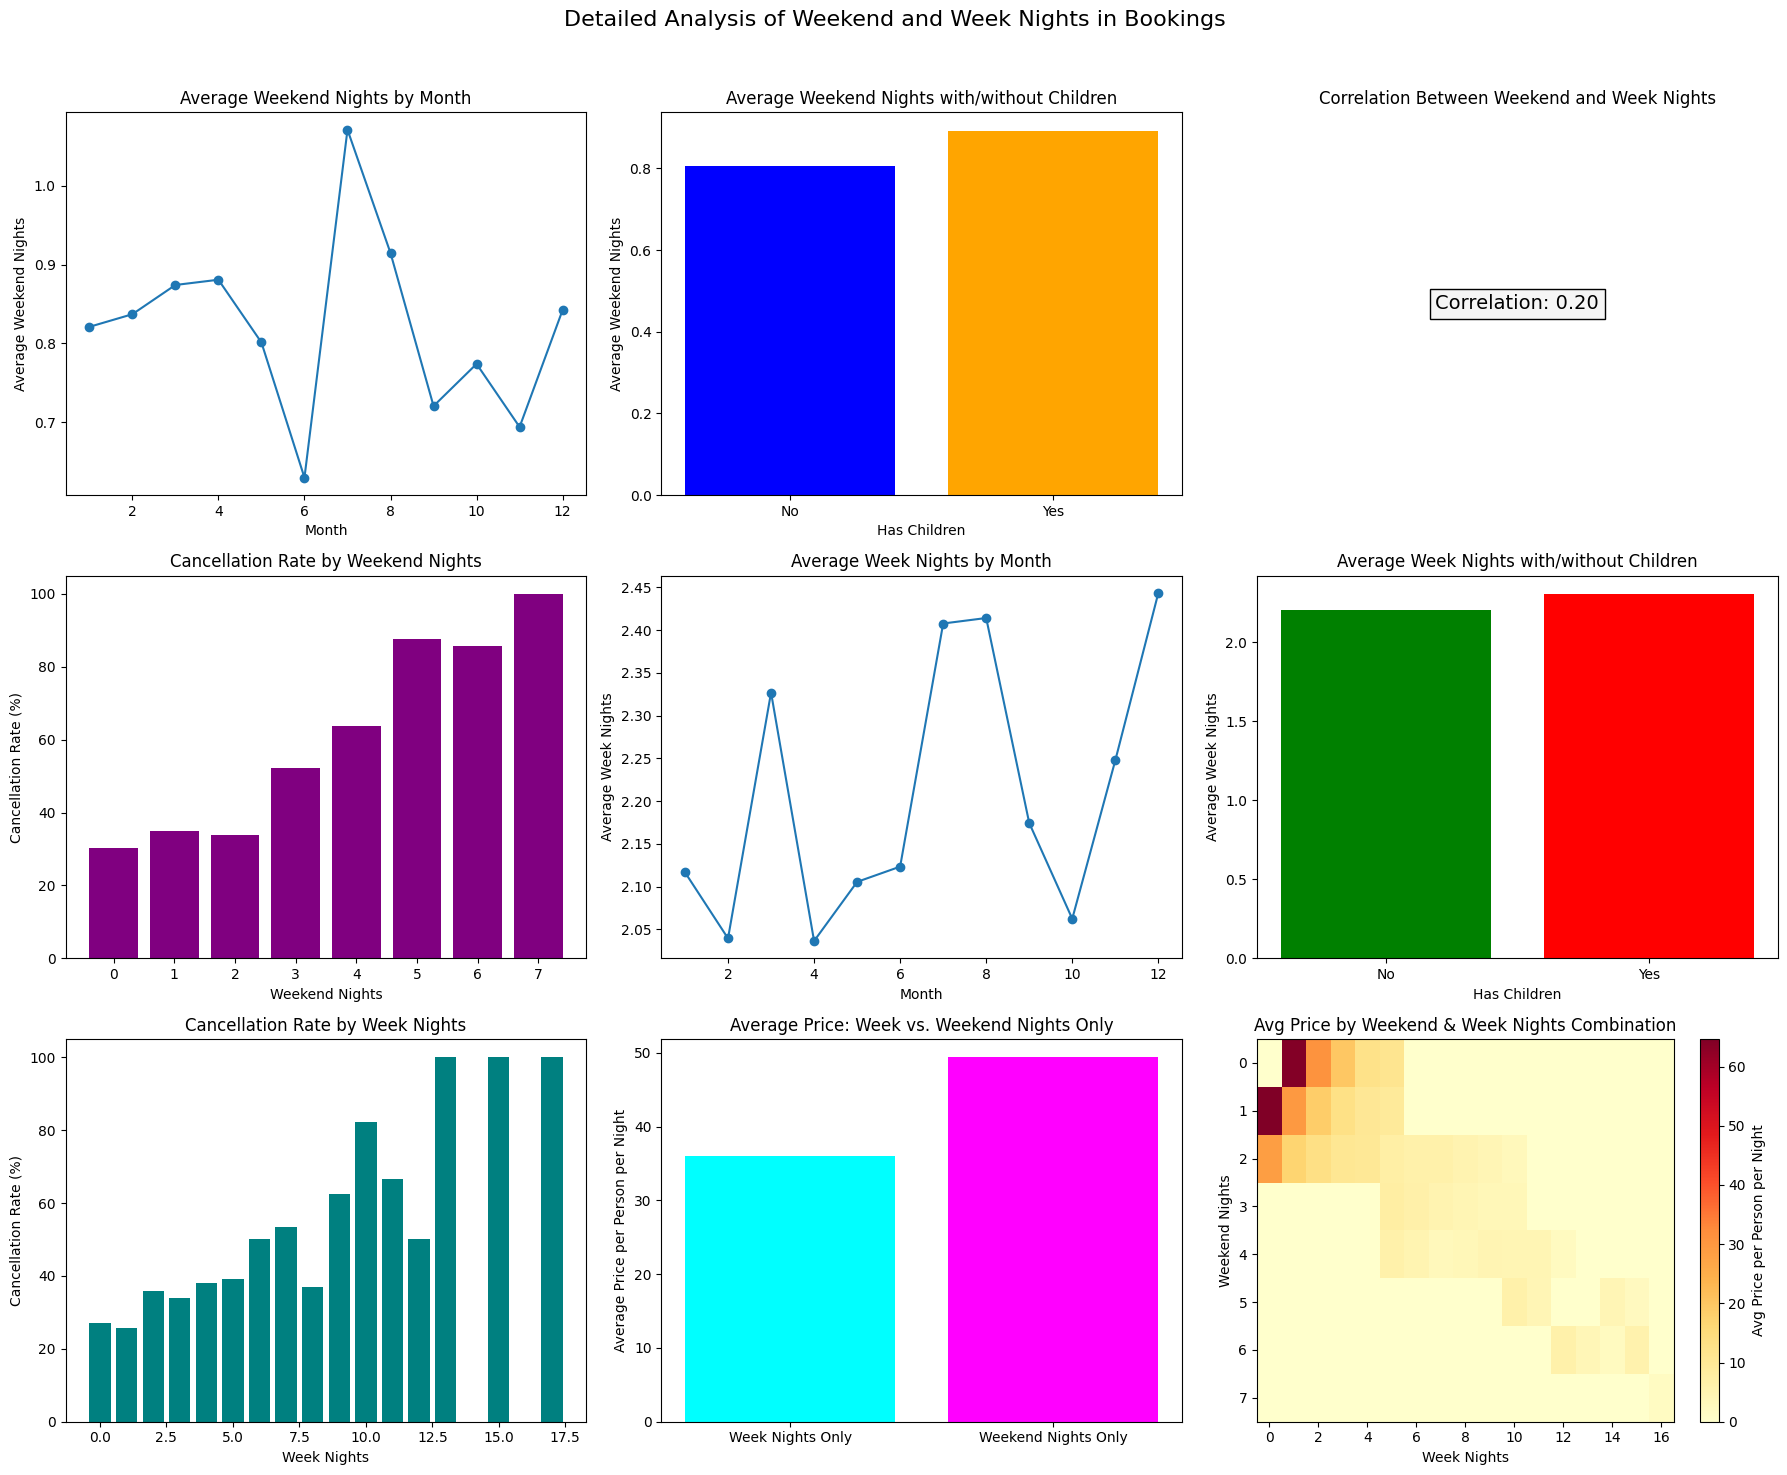

In [44]:
# Mainly AI Generated

# Plotting each metric on an organized canvas

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Detailed Analysis of Weekend and Week Nights in Bookings', fontsize=16)

# 1. Average Weekend Nights by Month (Line Chart)
axes[0, 0].plot(week_days_analysis_results["Weekend Nights by Month"].index, week_days_analysis_results["Weekend Nights by Month"].values, marker='o')
axes[0, 0].set_title('Average Weekend Nights by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Weekend Nights')

# 2. Average Weekend Nights with Children (Bar Chart)
axes[0, 1].bar(week_days_analysis_results["Weekend Nights with Children"].index, week_days_analysis_results["Weekend Nights with Children"].values, color=['blue', 'orange'])
axes[0, 1].set_title('Average Weekend Nights with/without Children')
axes[0, 1].set_xlabel('Has Children')
axes[0, 1].set_ylabel('Average Weekend Nights')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No', 'Yes'])

# 3. Correlation Between Weekend and Week Nights (Text Display)
axes[0, 2].text(0.5, 0.5, f"Correlation: {week_days_analysis_results['Weekend-Week Nights Correlation']:.2f}", 
                ha='center', va='center', fontsize=14, bbox=dict(facecolor='whitesmoke', edgecolor='black'))
axes[0, 2].set_title('Correlation Between Weekend and Week Nights')
axes[0, 2].axis('off')

# 4. Cancellation Rate by Weekend Nights (Bar Chart)
axes[1, 0].bar(week_days_analysis_results["Cancellation Rate by Weekend Nights"].index, week_days_analysis_results["Cancellation Rate by Weekend Nights"].values, color='purple')
axes[1, 0].set_title('Cancellation Rate by Weekend Nights')
axes[1, 0].set_xlabel('Weekend Nights')
axes[1, 0].set_ylabel('Cancellation Rate (%)')

# 5. Average Week Nights by Month (Line Chart)
axes[1, 1].plot(week_days_analysis_results["Week Nights by Month"].index, week_days_analysis_results["Week Nights by Month"].values, marker='o')
axes[1, 1].set_title('Average Week Nights by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Week Nights')

# 6. Average Week Nights with Children (Bar Chart)
axes[1, 2].bar(week_days_analysis_results["Week Nights with Children"].index, week_days_analysis_results["Week Nights with Children"].values, color=['green', 'red'])
axes[1, 2].set_title('Average Week Nights with/without Children')
axes[1, 2].set_xlabel('Has Children')
axes[1, 2].set_ylabel('Average Week Nights')
axes[1, 2].set_xticks([0, 1])
axes[1, 2].set_xticklabels(['No', 'Yes'])

# 7. Cancellation Rate by Week Nights (Bar Chart)
axes[2, 0].bar(week_days_analysis_results["Cancellation Rate by Week Nights"].index, week_days_analysis_results["Cancellation Rate by Week Nights"].values, color='teal')
axes[2, 0].set_title('Cancellation Rate by Week Nights')
axes[2, 0].set_xlabel('Week Nights')
axes[2, 0].set_ylabel('Cancellation Rate (%)')

# 8. Comparison of Prices - Week vs Weekend Nights Only (Bar Chart)
axes[2, 1].bar(['Week Nights Only', 'Weekend Nights Only'], [week_days_analysis_results["Only Week Nights Price"], week_days_analysis_results["Only Weekend Nights Price"]], color=['cyan', 'magenta'])
axes[2, 1].set_title('Average Price: Week vs. Weekend Nights Only')
axes[2, 1].set_ylabel('Average Price per Person per Night')

# 9. Price by Weekend and Week Nights Combination (Heatmap)
# Reshaping data for heatmap
price_matrix = week_days_analysis_results["Price by Weekend and Week Nights"].unstack().fillna(0)  # Filling NaN with 0 for visual clarity
cax = axes[2, 2].imshow(price_matrix, cmap='YlOrRd', aspect='auto')
axes[2, 2].set_title('Avg Price by Weekend & Week Nights Combination')
axes[2, 2].set_xlabel('Week Nights')
axes[2, 2].set_ylabel('Weekend Nights')
fig.colorbar(cax, ax=axes[2, 2], orientation='vertical', label='Avg Price per Person per Night')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title space
plt.show()


- With Children: Bookings with children tend to have more weekend nights compared to those without children, suggesting that families might be leveraging weekend stays to reduce disruption during the school week or to make the most of shorter trips. (Very small)

- Week Nights: This pattern of longer stays with children also holds for week nights, though the effect is generally smaller. This shows that families are somewhat inclined to plan longer stays regardless of the weekday type, but the impact is more pronounced for weekend nights. (Very small)

- The average prices are higher when people book weekends only compared to week days only

- For both weekend and week nights, cancellation rates increase with longer stays. which is very apparent, that the cancellation rate almost double with each week of stay

- Bookings with only weekend nights have a higher average price per person per night than those with only week nights. This suggests that weekend stays might command premium pricing, potentially reflecting higher demand or value for leisure travelers.

- Leveraging this insight, pricing strategies could focus on maximizing weekend rates or offering mid-week discounts to boost occupancy during typically slower periods.

- Both weekend nights and week nights show noticeable monthly fluctuations, suggesting seasonality in booking behavior. For instance, higher averages in certain months may indicate periods of peak travel or popular vacation times.
This seasonal insight could help optimize pricing or promotional strategies, targeting months where longer stays are more common.

## Cars Parking Space analysis

In [45]:
total_stay_by_parking = df.groupby('required_car_parking_space')['total_nights'].mean()

monthly_parking_percentage = df.groupby('arrival_month')['required_car_parking_space'].mean() * 100

avg_price_per_room_by_parking = df.groupby('required_car_parking_space')['avg_price_per_room'].mean()
avg_price_per_person_by_parking = df.groupby('required_car_parking_space')['avg_price_per_person_per_night'].mean()

special_requests_by_parking = df.groupby('required_car_parking_space')['no_of_special_requests'].mean()

total_guests_by_parking = df.groupby('required_car_parking_space')['total_guests'].mean()

car_parking_analysis_results = {
    "Total Stay by Parking Requirement": total_stay_by_parking,
    "Monthly Parking Requirement Percentage": monthly_parking_percentage,
    "Avg Price per Room by Parking Requirement": avg_price_per_room_by_parking,
    "Avg Price per Person per Night by Parking Requirement": avg_price_per_person_by_parking,
    "Special Requests by Parking Requirement": special_requests_by_parking,
    "Total Guests by Parking Requirement": total_guests_by_parking
}

In [46]:
# pprint(car_parking_analysis_results)


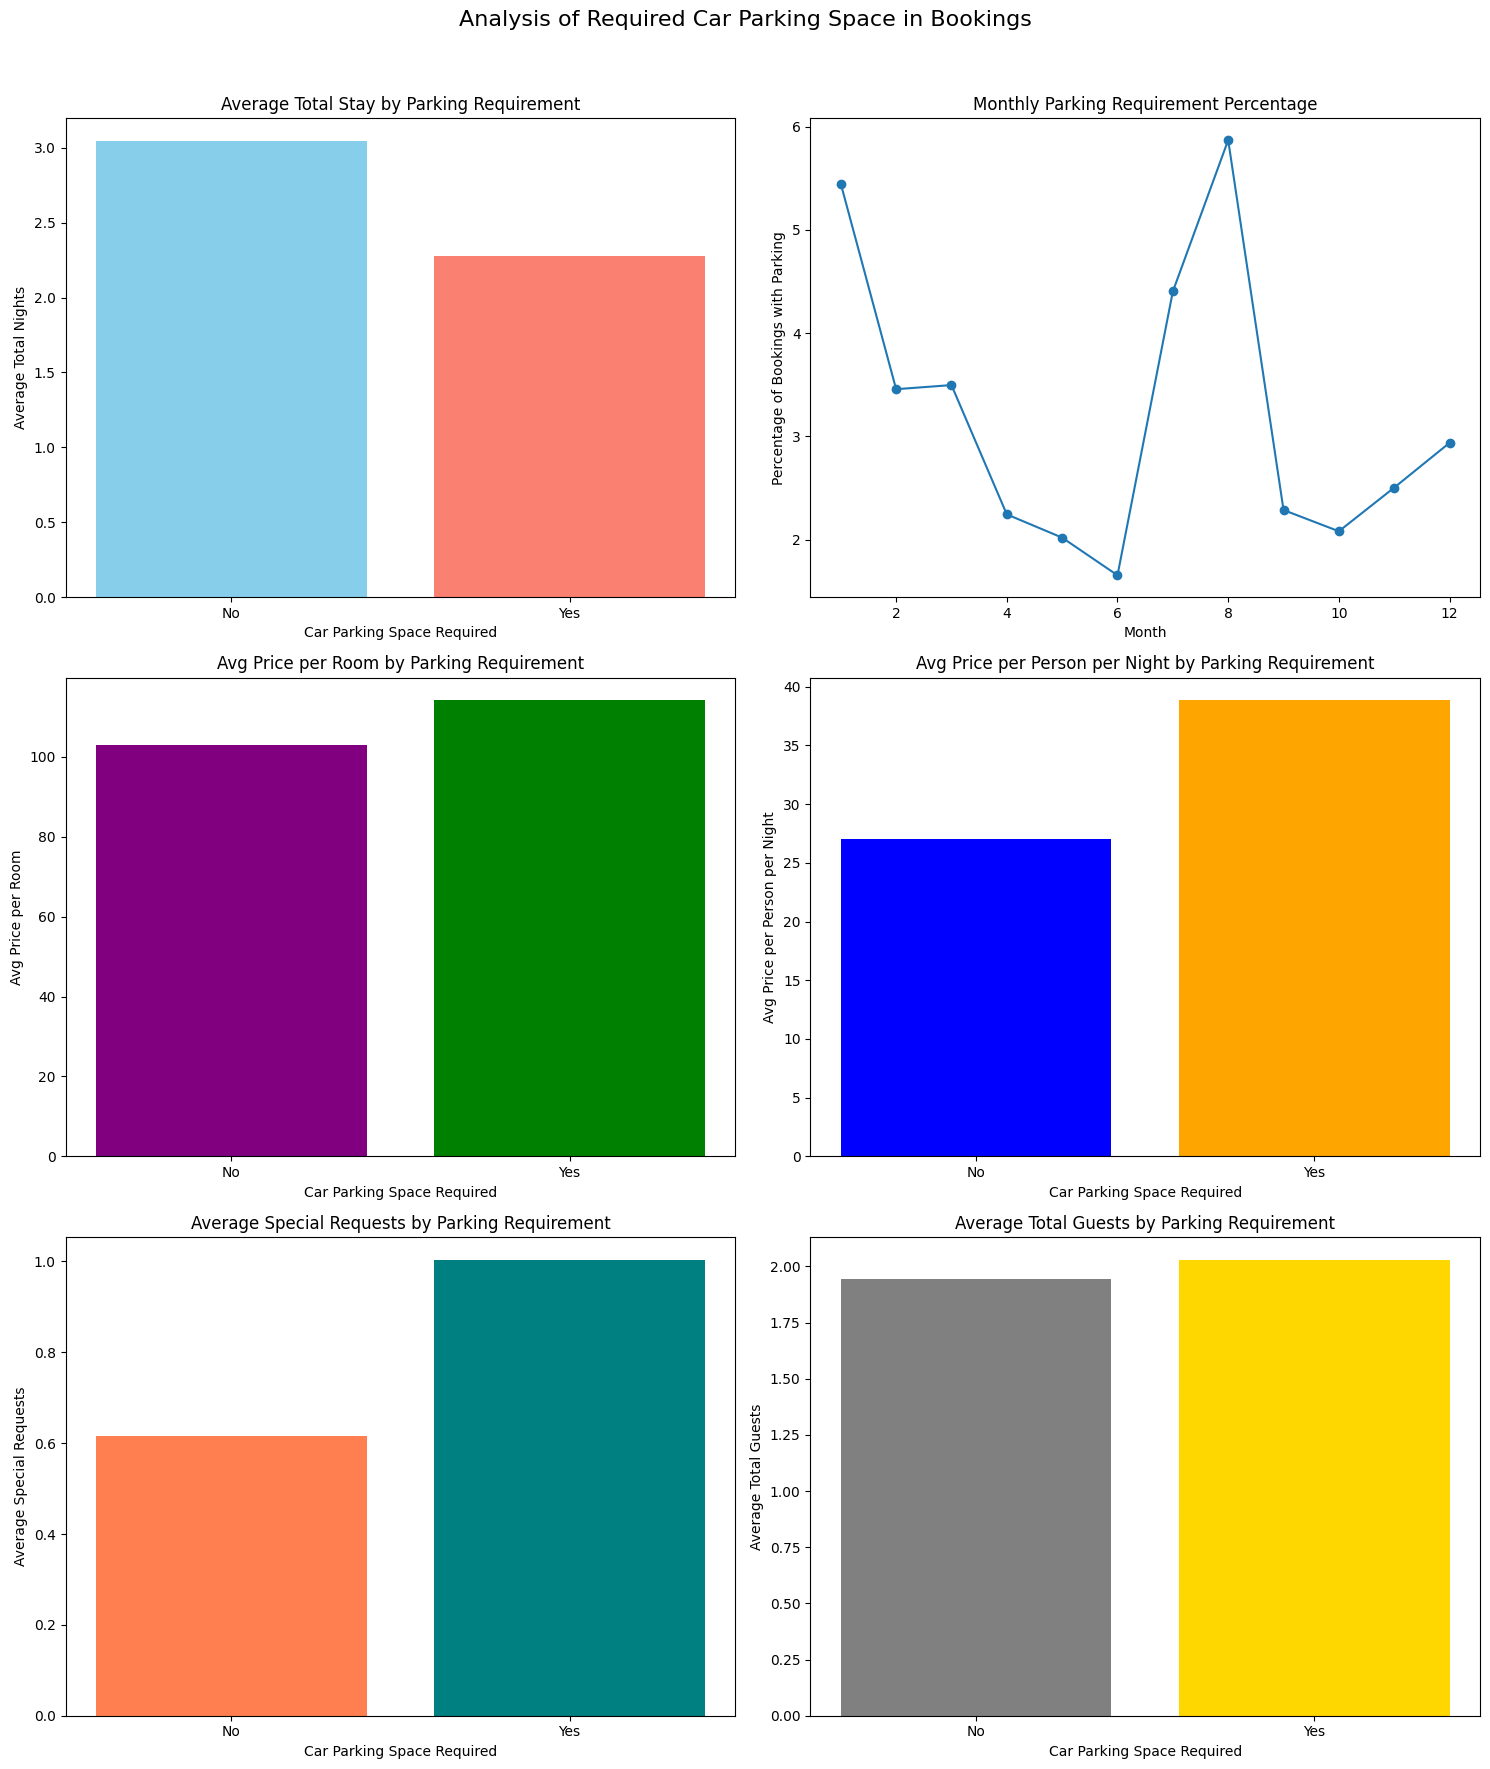

In [47]:
# Mainly AI Generated

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Analysis of Required Car Parking Space in Bookings', fontsize=16)

# 1. Average Total Stay by Parking Requirement (Bar Chart)
axes[0, 0].bar(car_parking_analysis_results["Total Stay by Parking Requirement"].index, 
               car_parking_analysis_results["Total Stay by Parking Requirement"].values, color=['skyblue', 'salmon'])
axes[0, 0].set_title('Average Total Stay by Parking Requirement')
axes[0, 0].set_xlabel('Car Parking Space Required')
axes[0, 0].set_ylabel('Average Total Nights')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No', 'Yes'])

# 2. Monthly Parking Requirement Percentage (Line Chart)
axes[0, 1].plot(car_parking_analysis_results["Monthly Parking Requirement Percentage"].index, 
                car_parking_analysis_results["Monthly Parking Requirement Percentage"].values, marker='o')
axes[0, 1].set_title('Monthly Parking Requirement Percentage')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Percentage of Bookings with Parking')

# 3. Average Price per Room by Parking Requirement (Bar Chart)
axes[1, 0].bar(car_parking_analysis_results["Avg Price per Room by Parking Requirement"].index, 
               car_parking_analysis_results["Avg Price per Room by Parking Requirement"].values, color=['purple', 'green'])
axes[1, 0].set_title('Avg Price per Room by Parking Requirement')
axes[1, 0].set_xlabel('Car Parking Space Required')
axes[1, 0].set_ylabel('Avg Price per Room')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No', 'Yes'])

# 4. Average Price per Person per Night by Parking Requirement (Bar Chart)
axes[1, 1].bar(car_parking_analysis_results["Avg Price per Person per Night by Parking Requirement"].index, 
               car_parking_analysis_results["Avg Price per Person per Night by Parking Requirement"].values, color=['blue', 'orange'])
axes[1, 1].set_title('Avg Price per Person per Night by Parking Requirement')
axes[1, 1].set_xlabel('Car Parking Space Required')
axes[1, 1].set_ylabel('Avg Price per Person per Night')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No', 'Yes'])

# 5. Special Requests by Parking Requirement (Bar Chart)
axes[2, 0].bar(car_parking_analysis_results["Special Requests by Parking Requirement"].index, 
               car_parking_analysis_results["Special Requests by Parking Requirement"].values, color=['coral', 'teal'])
axes[2, 0].set_title('Average Special Requests by Parking Requirement')
axes[2, 0].set_xlabel('Car Parking Space Required')
axes[2, 0].set_ylabel('Average Special Requests')
axes[2, 0].set_xticks([0, 1])
axes[2, 0].set_xticklabels(['No', 'Yes'])

# 6. Total Guests by Parking Requirement (Bar Chart)
axes[2, 1].bar(car_parking_analysis_results["Total Guests by Parking Requirement"].index, 
               car_parking_analysis_results["Total Guests by Parking Requirement"].values, color=['grey', 'gold'])
axes[2, 1].set_title('Average Total Guests by Parking Requirement')
axes[2, 1].set_xlabel('Car Parking Space Required')
axes[2, 1].set_ylabel('Average Total Guests')
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['No', 'Yes'])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title space
plt.show()


- Link Between Parking and Longer, More Customized Stays: Bookings with a parking requirement are often longer stays with more special requests, suggesting that guests with a vehicle may anticipate more in-room amenities and are likely to plan for a more tailored stay.

- Pricing Implications: The slight premium in room prices for bookings with parking requirements hints at either demand-driven pricing for rooms with parking availability or a general trend where higher-paying guests are more likely to require parking.

- Monthly Demand Trends: The seasonal variation in parking demand underscores an opportunity for resource planning and targeted marketing during peak months.

- Higher Average Total Guests: Bookings with a parking request typically have a larger group size. This makes sense, as families or groups traveling together may need a car to accommodate everyone.

##  Arrival Year Analysis

In [48]:
cancellation_rate_by_year = df.groupby('arrival_year')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)

avg_price_per_room_by_year = df.groupby('arrival_year')['avg_price_per_room'].mean()
avg_price_per_person_by_year = df.groupby('arrival_year')['avg_price_per_person_per_night'].mean()

monthly_traffic_by_year = df.groupby(['arrival_year', 'arrival_month']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())

avg_total_nights_by_year = df.groupby('arrival_year')['total_nights'].mean()

avg_special_requests_by_year = df.groupby('arrival_year')['no_of_special_requests'].mean()

arrival_year_analysis_results = {
    "Cancellation Rate by Year": cancellation_rate_by_year,
    "Avg Price per Room by Year": avg_price_per_room_by_year,
    "Avg Price per Person per Night by Year": avg_price_per_person_by_year,
    "Monthly Traffic by Year": monthly_traffic_by_year,
    "Average Total Nights by Year": avg_total_nights_by_year,
    "Average Special Requests by Year": avg_special_requests_by_year
}

In [49]:
df.arrival_year.value_counts()

arrival_year
2018    7359
2017    1702
Name: count, dtype: int64

In [50]:
df[df.arrival_year == 2017].arrival_month.unique()

array([ 7,  8,  9, 10, 11, 12])

In [51]:
# pprint(arrival_year_analysis_results)

#### Since seasonality heavily affects the data, comparing the two years won't be fair, and we can compare only the last 5 months of each year for more precise comparison, yet we cannot determine if the huge disparity in the data distribution is due to the year or the data collection strategy.

## Arrival Months

In [52]:

df_2018 = df[df['arrival_year'] == 2018].copy()

cancellation_rate_by_month = df_2018.groupby('arrival_month')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)

avg_price_per_room_by_month = df_2018.groupby('arrival_month')['avg_price_per_room'].mean()
avg_price_per_person_by_month = df_2018.groupby('arrival_month')['avg_price_per_person_per_night'].mean()

monthly_booking_volume = df_2018['arrival_month'].value_counts(normalize=True).sort_index() * 100

avg_total_nights_by_month = df_2018.groupby('arrival_month')['total_nights'].mean()

avg_lead_time_by_month = df_2018.groupby('arrival_month')['lead_time'].mean()

avg_special_requests_by_month = df_2018.groupby('arrival_month')['no_of_special_requests'].mean()

arrival_month_analysis_results = {
    "Cancellation Rate by Month": cancellation_rate_by_month,
    "Avg Price per Room by Month": avg_price_per_room_by_month,
    "Avg Price per Person per Night by Month": avg_price_per_person_by_month,
    "Booking Volume by Month": monthly_booking_volume,
    "Average Total Nights by Month": avg_total_nights_by_month,
    "Average Lead Time by Month": avg_lead_time_by_month,
    "Average Special Requests by Month": avg_special_requests_by_month
}

In [53]:
# pprint(arrival_month_analysis_results)

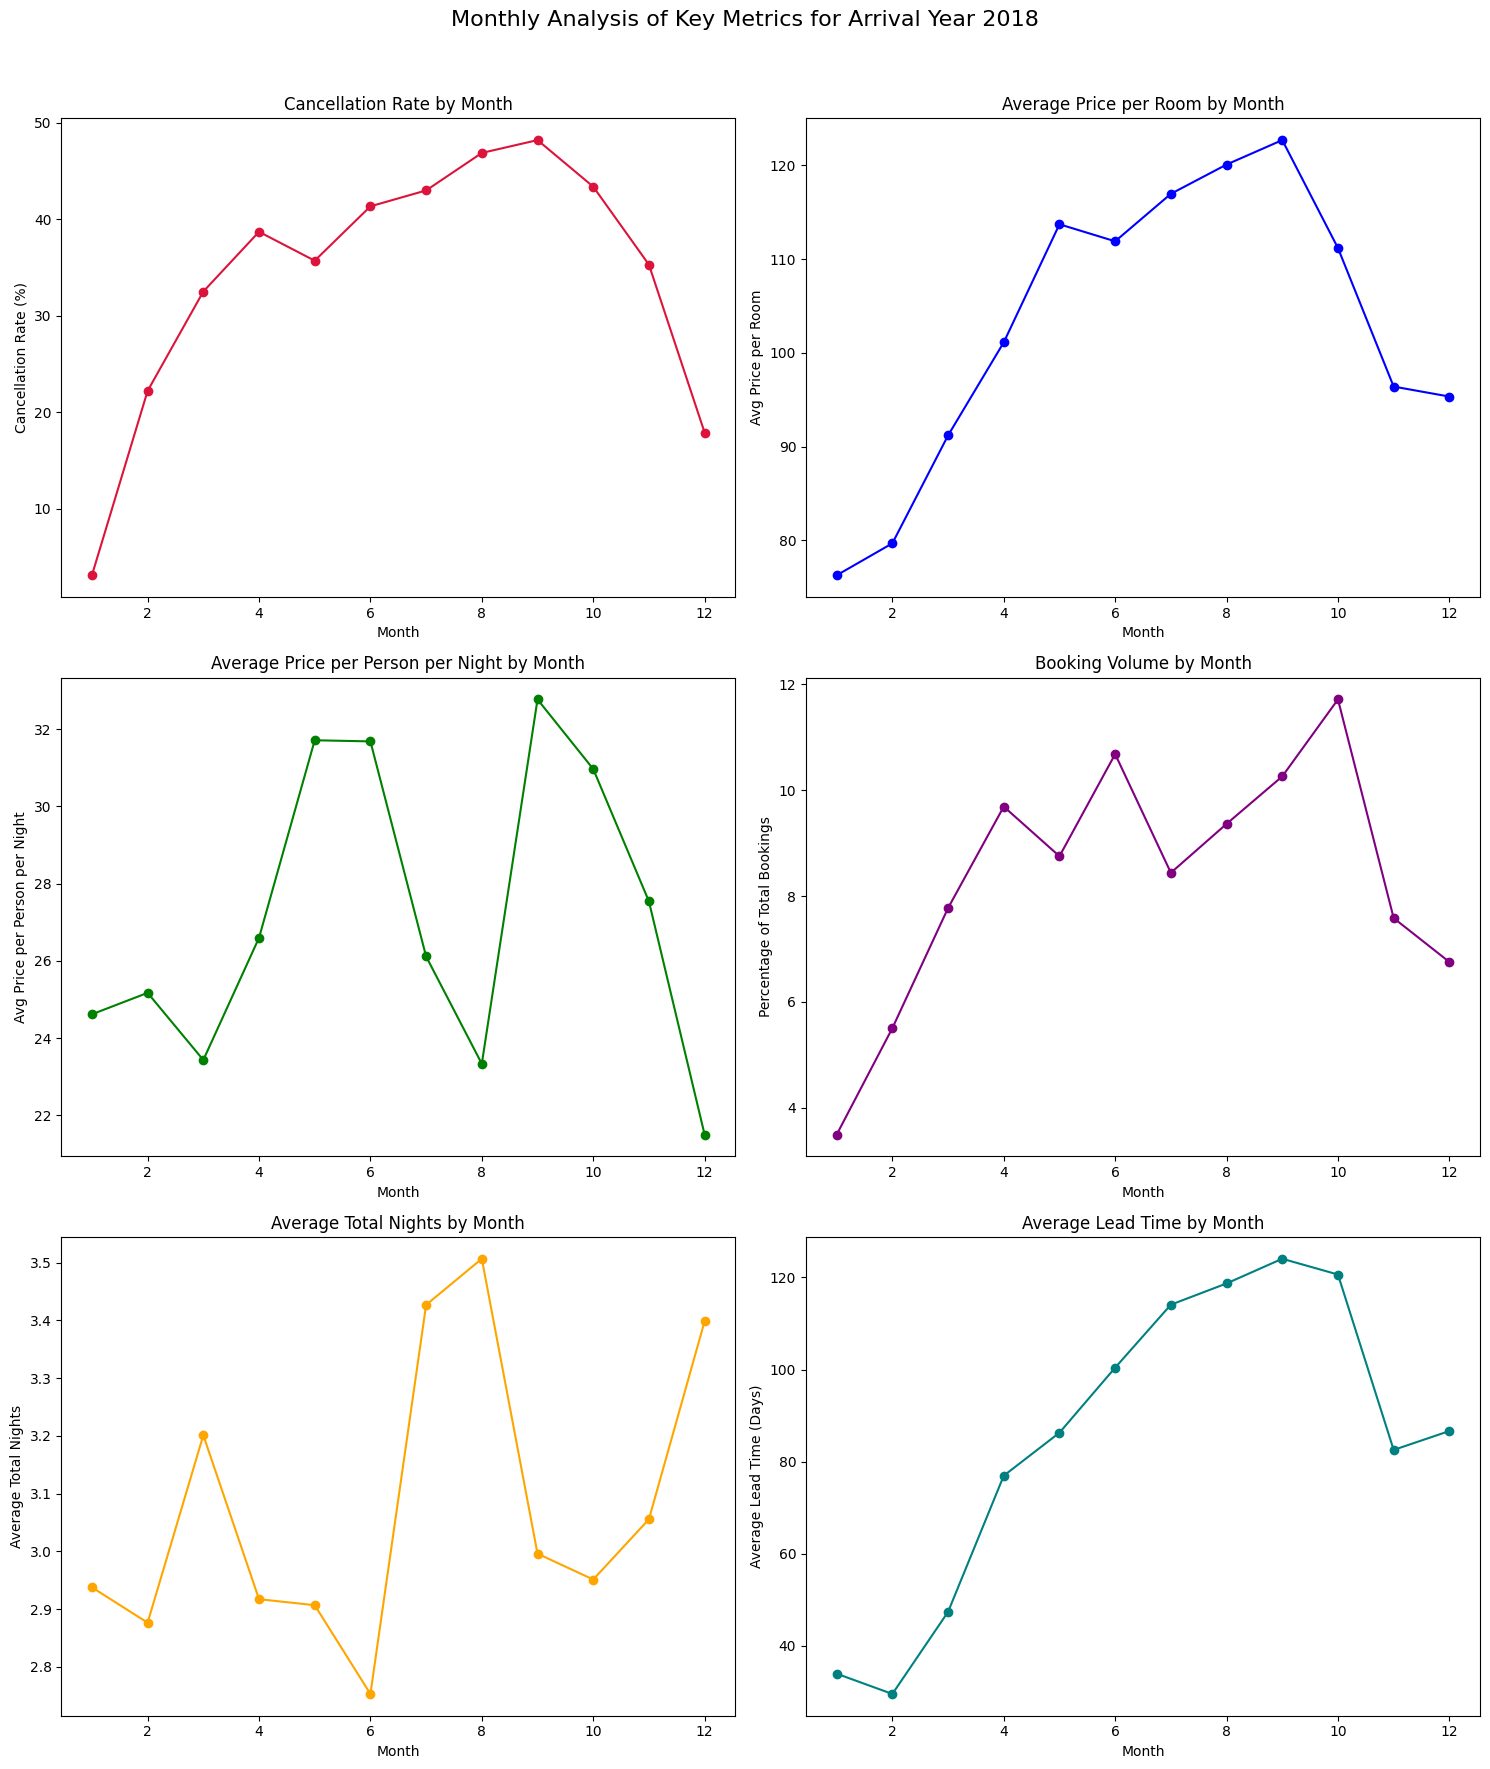

In [54]:
# Mainly AI Generated

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Monthly Analysis of Key Metrics for Arrival Year 2018', fontsize=16)

# 1. Cancellation Rate by Month (Line Chart)
axes[0, 0].plot(arrival_month_analysis_results["Cancellation Rate by Month"].index, 
                arrival_month_analysis_results["Cancellation Rate by Month"].values, marker='o', color='crimson')
axes[0, 0].set_title('Cancellation Rate by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Cancellation Rate (%)')

# 2. Average Price per Room by Month (Line Chart)
axes[0, 1].plot(arrival_month_analysis_results["Avg Price per Room by Month"].index, 
                arrival_month_analysis_results["Avg Price per Room by Month"].values, marker='o', color='blue')
axes[0, 1].set_title('Average Price per Room by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Avg Price per Room')

# 3. Average Price per Person per Night by Month (Line Chart)
axes[1, 0].plot(arrival_month_analysis_results["Avg Price per Person per Night by Month"].index, 
                arrival_month_analysis_results["Avg Price per Person per Night by Month"].values, marker='o', color='green')
axes[1, 0].set_title('Average Price per Person per Night by Month')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Avg Price per Person per Night')

# 4. Booking Volume by Month (Line Chart)
axes[1, 1].plot(arrival_month_analysis_results["Booking Volume by Month"].index, 
                arrival_month_analysis_results["Booking Volume by Month"].values, marker='o', color='purple')
axes[1, 1].set_title('Booking Volume by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Percentage of Total Bookings')

# 5. Average Total Nights by Month (Line Chart)
axes[2, 0].plot(arrival_month_analysis_results["Average Total Nights by Month"].index, 
                arrival_month_analysis_results["Average Total Nights by Month"].values, marker='o', color='orange')
axes[2, 0].set_title('Average Total Nights by Month')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Average Total Nights')

# 6. Average Lead Time by Month (Line Chart)
axes[2, 1].plot(arrival_month_analysis_results["Average Lead Time by Month"].index, 
                arrival_month_analysis_results["Average Lead Time by Month"].values, marker='o', color='teal')
axes[2, 1].set_title('Average Lead Time by Month')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Average Lead Time (Days)')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title space
plt.show()


- There is a clear trend and relationship between cancellations rate, number of bookings, average lead time, number of special requests and average price per room. This all aims on a raise in the 3rd quarter of the year

- The price charts indicate whether monthly trends show higher prices during peak demand periods, aligning with months with high booking volumes or longer average stays.

## Market Segments

In [55]:
# This is a very important feature for the EDA, so I'll do a bit more analysis on it:


avg_price_per_room_by_segment = df.groupby('market_segment_type')['avg_price_per_room'].mean()
avg_price_per_person_by_segment = df.groupby('market_segment_type')['avg_price_per_person_per_night'].mean()

avg_total_nights_by_segment = df.groupby('market_segment_type')['total_nights'].mean()

avg_lead_time_by_segment = df.groupby('market_segment_type')['lead_time'].mean()

cancellation_rate_by_segment = df.groupby('market_segment_type')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)


monthly_distribution_by_segment = df.groupby(['market_segment_type', 'arrival_month']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum())


total_revenue = df['avg_price_per_room'].sum()
revenue_by_segment = df.groupby('market_segment_type')['avg_price_per_room'].sum() / total_revenue * 100

special_requests_by_segment = df.groupby('market_segment_type')['no_of_special_requests'].mean()

avg_weekend_nights_by_segment = df.groupby('market_segment_type')['no_of_weekend_nights'].mean()
avg_week_nights_by_segment = df.groupby('market_segment_type')['no_of_week_nights'].mean()

market_segment_analysis_results = {
    "Avg Price per Room by Segment": avg_price_per_room_by_segment,
    "Avg Price per Person by Segment": avg_price_per_person_by_segment,
    "Average Total Nights by Segment": avg_total_nights_by_segment,
    "Average Lead Time by Segment": avg_lead_time_by_segment,
    "Cancellation Rate by Segment": cancellation_rate_by_segment,
    # "Monthly Distribution by Segment": monthly_distribution_by_segment,
    "Revenue Contribution by Segment": revenue_by_segment,
    "Special Requests by Segment": special_requests_by_segment,
    "Avg Weekend Nights by Segment": avg_weekend_nights_by_segment,
    "Avg Week Nights by Segment": avg_week_nights_by_segment
}

In [56]:
df.market_segment_type.value_counts() * 100/len(df)

market_segment_type
Online           63.911268
Offline          29.080675
Corporate         5.694736
Complementary     1.026377
Aviation          0.286944
Name: count, dtype: float64

In [57]:
# pprint(market_segment_analysis_results)

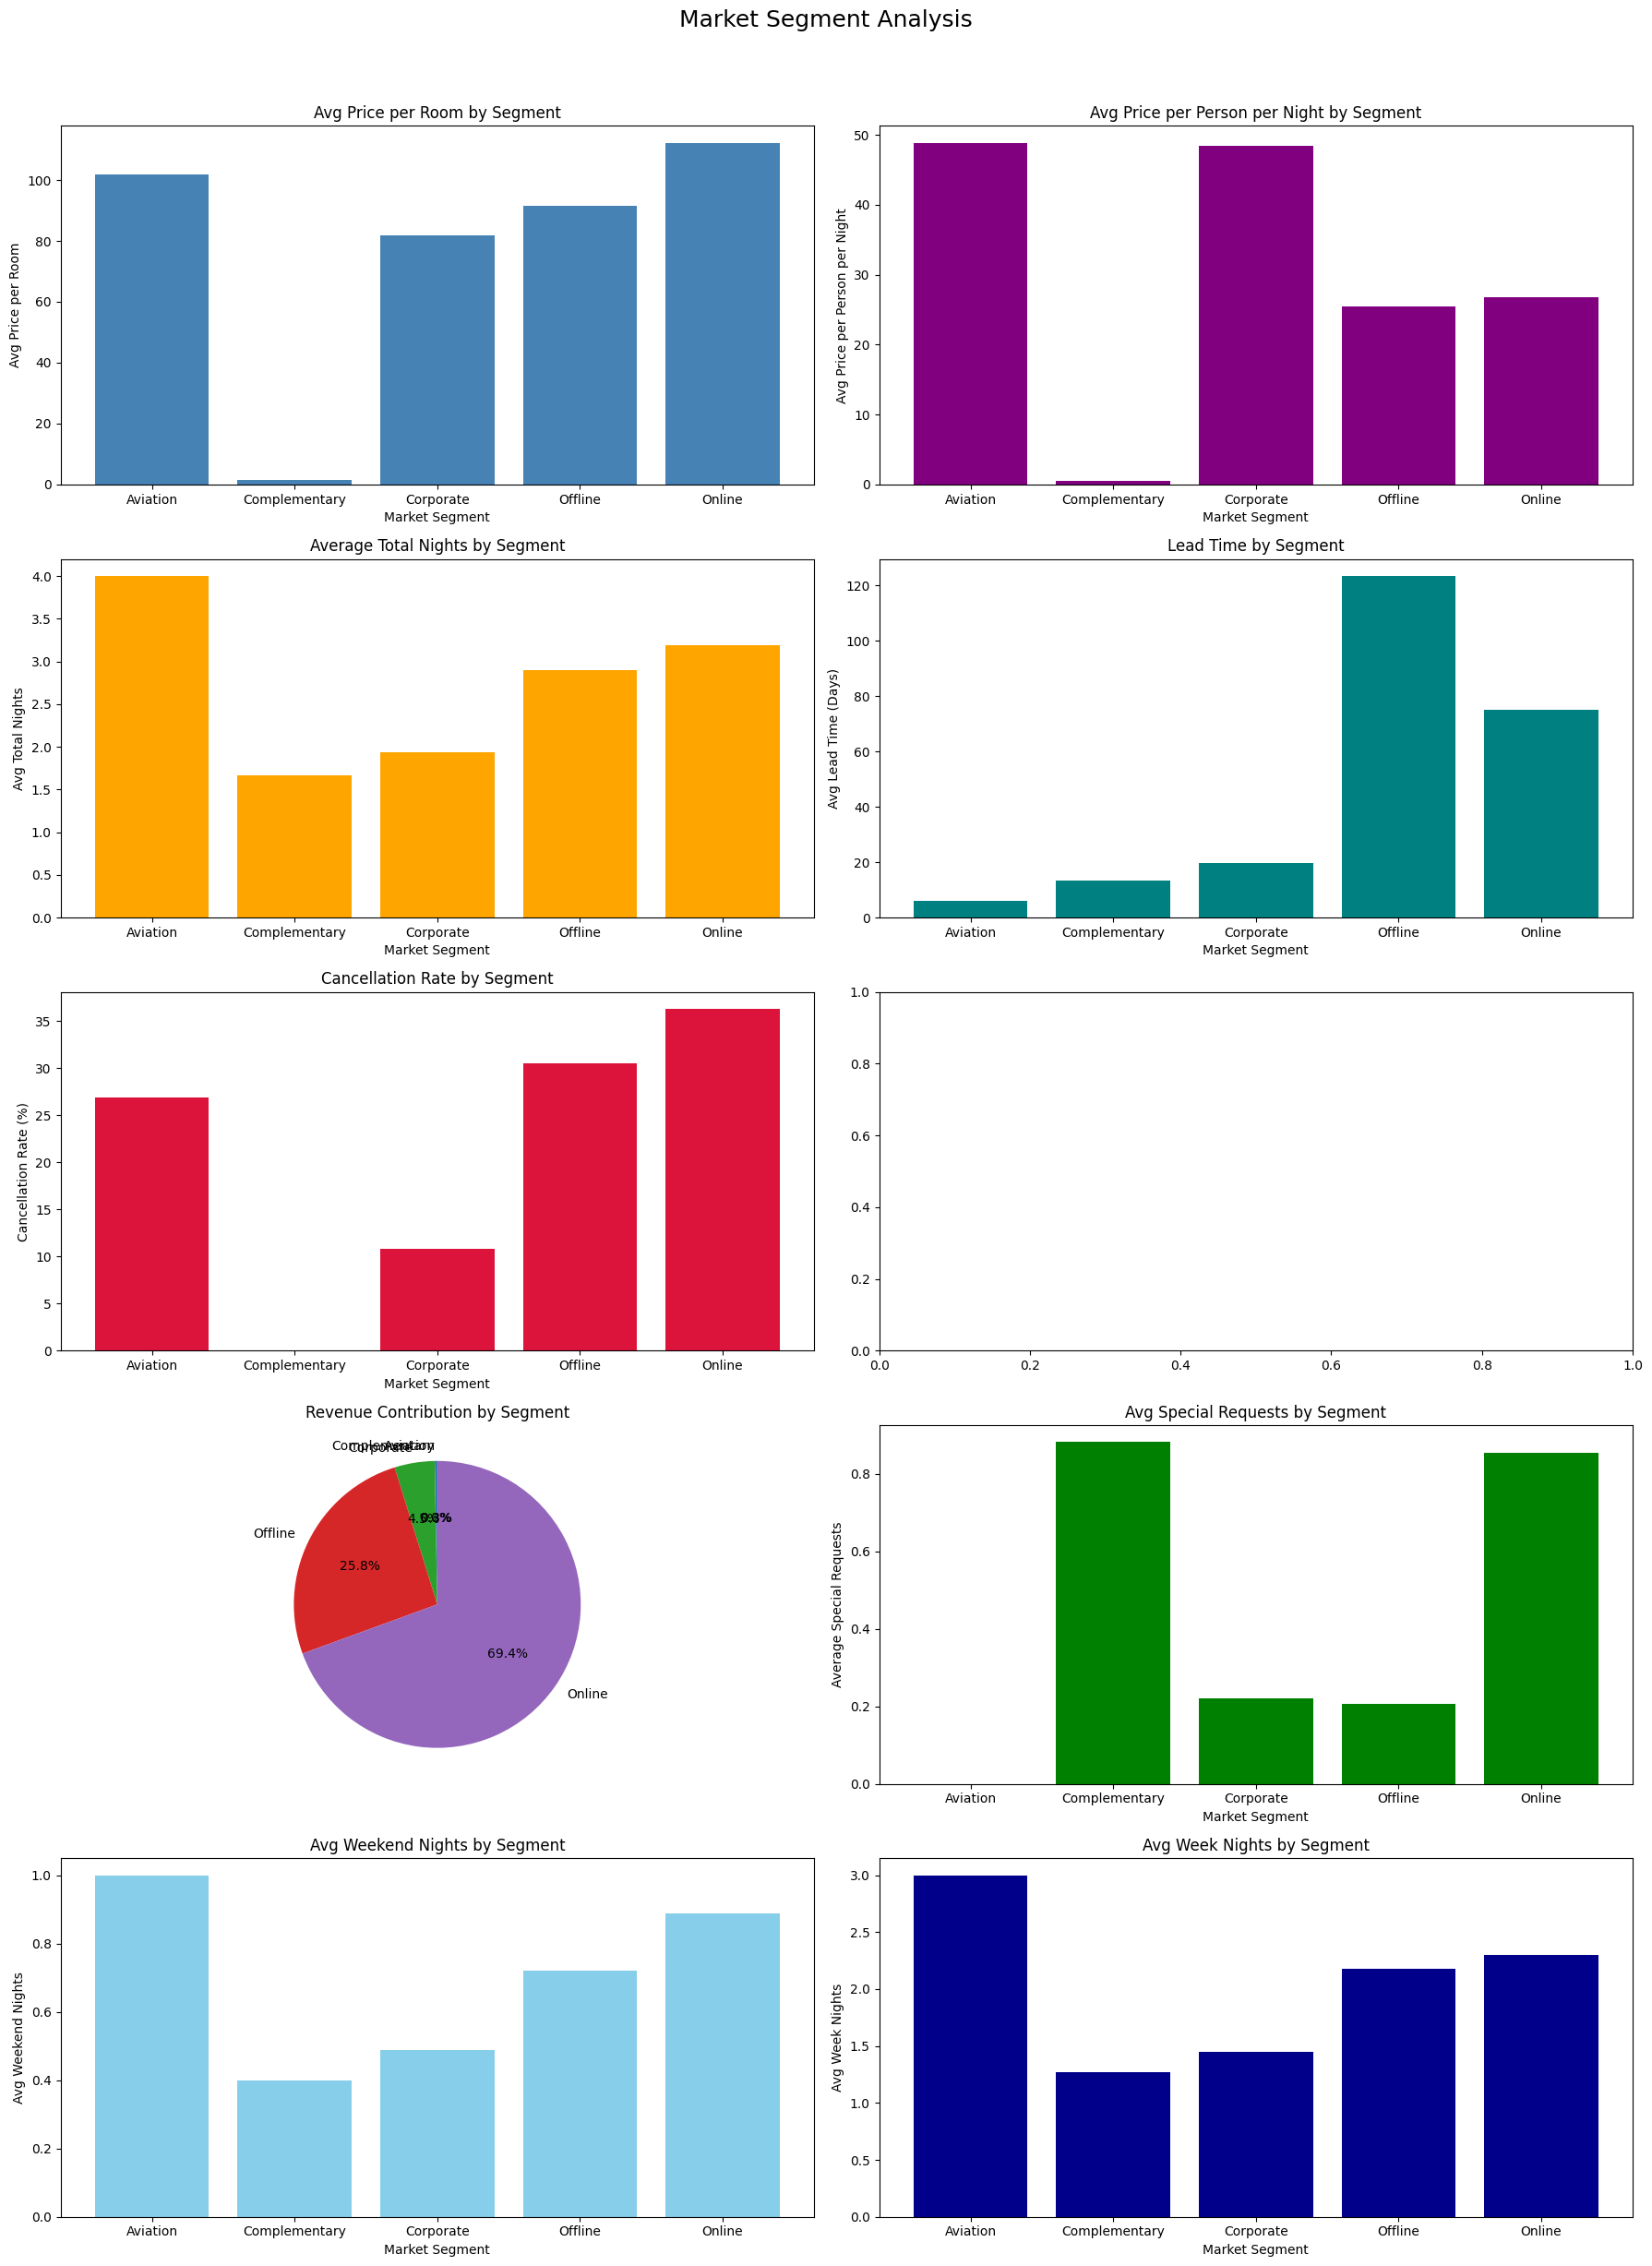

In [58]:
# Mainly AI Generated

fig, axes = plt.subplots(5, 2, figsize=(18, 25))
fig.suptitle('Market Segment Analysis', fontsize=18)

# 1. Average Price per Room by Segment (Bar Chart)
axes[0, 0].bar(market_segment_analysis_results["Avg Price per Room by Segment"].index, 
               market_segment_analysis_results["Avg Price per Room by Segment"].values, color='steelblue')
axes[0, 0].set_title('Avg Price per Room by Segment')
axes[0, 0].set_xlabel('Market Segment')
axes[0, 0].set_ylabel('Avg Price per Room')

# 2. Average Price per Person per Night by Segment (Bar Chart)
axes[0, 1].bar(market_segment_analysis_results["Avg Price per Person by Segment"].index, 
               market_segment_analysis_results["Avg Price per Person by Segment"].values, color='purple')
axes[0, 1].set_title('Avg Price per Person per Night by Segment')
axes[0, 1].set_xlabel('Market Segment')
axes[0, 1].set_ylabel('Avg Price per Person per Night')

# 3. Average Total Nights by Segment (Bar Chart)
axes[1, 0].bar(market_segment_analysis_results["Average Total Nights by Segment"].index, 
               market_segment_analysis_results["Average Total Nights by Segment"].values, color='orange')
axes[1, 0].set_title('Average Total Nights by Segment')
axes[1, 0].set_xlabel('Market Segment')
axes[1, 0].set_ylabel('Avg Total Nights')

# 4. Lead Time by Segment (Bar Chart)
axes[1, 1].bar(market_segment_analysis_results["Average Lead Time by Segment"].index, 
               market_segment_analysis_results["Average Lead Time by Segment"].values, color='teal')
axes[1, 1].set_title('Lead Time by Segment')
axes[1, 1].set_xlabel('Market Segment')
axes[1, 1].set_ylabel('Avg Lead Time (Days)')

# 5. Cancellation Rate by Segment (Bar Chart)
axes[2, 0].bar(market_segment_analysis_results["Cancellation Rate by Segment"].index, 
               market_segment_analysis_results["Cancellation Rate by Segment"].values, color='crimson')
axes[2, 0].set_title('Cancellation Rate by Segment')
axes[2, 0].set_xlabel('Market Segment')
axes[2, 0].set_ylabel('Cancellation Rate (%)')


# 7. Revenue Contribution by Segment (Pie Chart)
axes[3, 0].pie(market_segment_analysis_results["Revenue Contribution by Segment"].values, 
               labels=market_segment_analysis_results["Revenue Contribution by Segment"].index, autopct='%1.1f%%', startangle=90)
axes[3, 0].set_title('Revenue Contribution by Segment')

# 8. Special Requests by Segment (Bar Chart)
axes[3, 1].bar(market_segment_analysis_results["Special Requests by Segment"].index, 
               market_segment_analysis_results["Special Requests by Segment"].values, color='green')
axes[3, 1].set_title('Avg Special Requests by Segment')
axes[3, 1].set_xlabel('Market Segment')
axes[3, 1].set_ylabel('Average Special Requests')

# 9. Average Weekend Nights by Segment (Bar Chart)
axes[4, 0].bar(market_segment_analysis_results["Avg Weekend Nights by Segment"].index, 
               market_segment_analysis_results["Avg Weekend Nights by Segment"].values, color='skyblue')
axes[4, 0].set_title('Avg Weekend Nights by Segment')
axes[4, 0].set_xlabel('Market Segment')
axes[4, 0].set_ylabel('Avg Weekend Nights')

# 10. Average Week Nights by Segment (Bar Chart)
axes[4, 1].bar(market_segment_analysis_results["Avg Week Nights by Segment"].index, 
               market_segment_analysis_results["Avg Week Nights by Segment"].values, color='darkblue')
axes[4, 1].set_title('Avg Week Nights by Segment')
axes[4, 1].set_xlabel('Market Segment')
axes[4, 1].set_ylabel('Avg Week Nights')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title space
plt.show()


- Online is almost 64% of all reservations

- Offline is 30% And Corporate is 5%
- Higher Average Price: Online bookings tend to have a higher average price per room and per person per night compared to other segments, especially Offline. This suggests that guests booking through online channels may be more willing to spend on rooms. And more likely to click on add-ons etc.
- Lower Price Sensitivity: Offline bookings, in contrast, often show a lower average price per room and per person. This might indicate either a higher price sensitivity or that offline bookings are handled differently (e.g., through travel agencies or walk-ins).consider offering value-added packages that maintain affordability but encourage additional spend

- Competitive Pricing: The Corporate segment often has specific pricing needs, and its average per-room price is typically lower than Online but higher than Offline.

-  Online bookings typically have a shorter average stay than Corporate but slightly longer than Offline.

-  Offline bookings tend to have the shortest stays. This may include last-minute bookings or local customers who are likely to spend only a night or two. single-night discounts or weekday offers, could be appealing to this segment.

-   Corporate bookings tend to have the longest average stay, likely due to business travelers who book for extended periods.

-   Online bookings generally have a longer lead time, as guests booking online tend to plan in advance, Offline bookings often have the shortest lead times, possibly because they are local or last-minute. Corporate bookings show the longest average lead time. Companies often plan well in advance, especially for business trips or conferences.

-   The Online segment generally has a higher cancellation rate, potentially due to the ease of booking (and canceling) online.  Offline bookings show a lower cancellation rate, which may reflect a stronger commitment from guests who book in person or through phone reservations. Corporate bookings have a moderate cancellation rate. Business needs can change, so some cancellations are expected.

-   Online bookings often peak during high-demand months (such as summer or holiday seasons), indicating a large proportion of leisure travelers. Offline bookings show a more stable distribution across the year, possibly representing local or business travelers with less seasonal variance.

-   The Online segment contributes a significant share of revenue, driven by both higher room prices and a larger volume of bookings. The Offline segment typically contributes less to total revenue due to lower average pricing. Although Corporate might contribute less overall, it offers stability and fills occupancy during low seasons.

-   Corporate bookings are primarily during the week, while Online and Offline segments may lean towards weekend stays. Customized weekday and weekend packages can maximize occupancy based on these preferences.

## Repeated Guests or Guests with Previous Reservations

In [59]:

monthly_booking_repeated_guests = df[df['repeated_guest'] == 1].groupby('arrival_month').size() / df.groupby('arrival_month').size() * 100

avg_special_requests_repeated = df.groupby('repeated_guest')['no_of_special_requests'].mean()

cancellation_rate_repeated = df.groupby('repeated_guest')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)

avg_total_guests_repeated = df.groupby('repeated_guest')['total_guests'].mean()
meal_preference_repeated = df[df['repeated_guest'] == 1]['type_of_meal_plan'].value_counts(normalize=True) * 100

has_children_repeated = df.groupby('repeated_guest')['has_children'].mean() * 100  # Percentage with children

avg_total_nights_repeated = df.groupby('repeated_guest')['total_nights'].mean()

correlation_with_reservations = df[['no_previous_reservations', 'total_nights', 'lead_time', 'no_of_special_requests']].corr()['no_previous_reservations']

avg_metrics_by_previous_reservations = df.groupby('no_previous_reservations')[['total_nights', 'lead_time', 'no_of_special_requests']].mean()

repeated_guest_analysis_results = {
    "Monthly Booking for Repeated Guests (%)": monthly_booking_repeated_guests,
    "Avg Special Requests by Repeated Status": avg_special_requests_repeated,
    "Cancellation Rate by Repeated Status": cancellation_rate_repeated,
    "Avg Total Guests by Repeated Status": avg_total_guests_repeated,
    "Meal Preference for Repeated Guests (%)": meal_preference_repeated,
    "Has Children by Repeated Status (%)": has_children_repeated,
    "Avg Total Nights by Repeated Status": avg_total_nights_repeated,
    "Correlation with Previous Reservations": correlation_with_reservations,
    "Avg Metrics by Previous Reservations Count": avg_metrics_by_previous_reservations
}

In [60]:
df.repeated_guest.value_counts() * 100 /len(df)

repeated_guest
0    97.351286
1     2.648714
Name: count, dtype: float64

In [61]:
# The analysis is on a very small segment of the data (2.5%) but I will try to make the most out of it :v

In [62]:
# pprint(repeated_guest_analysis_results)

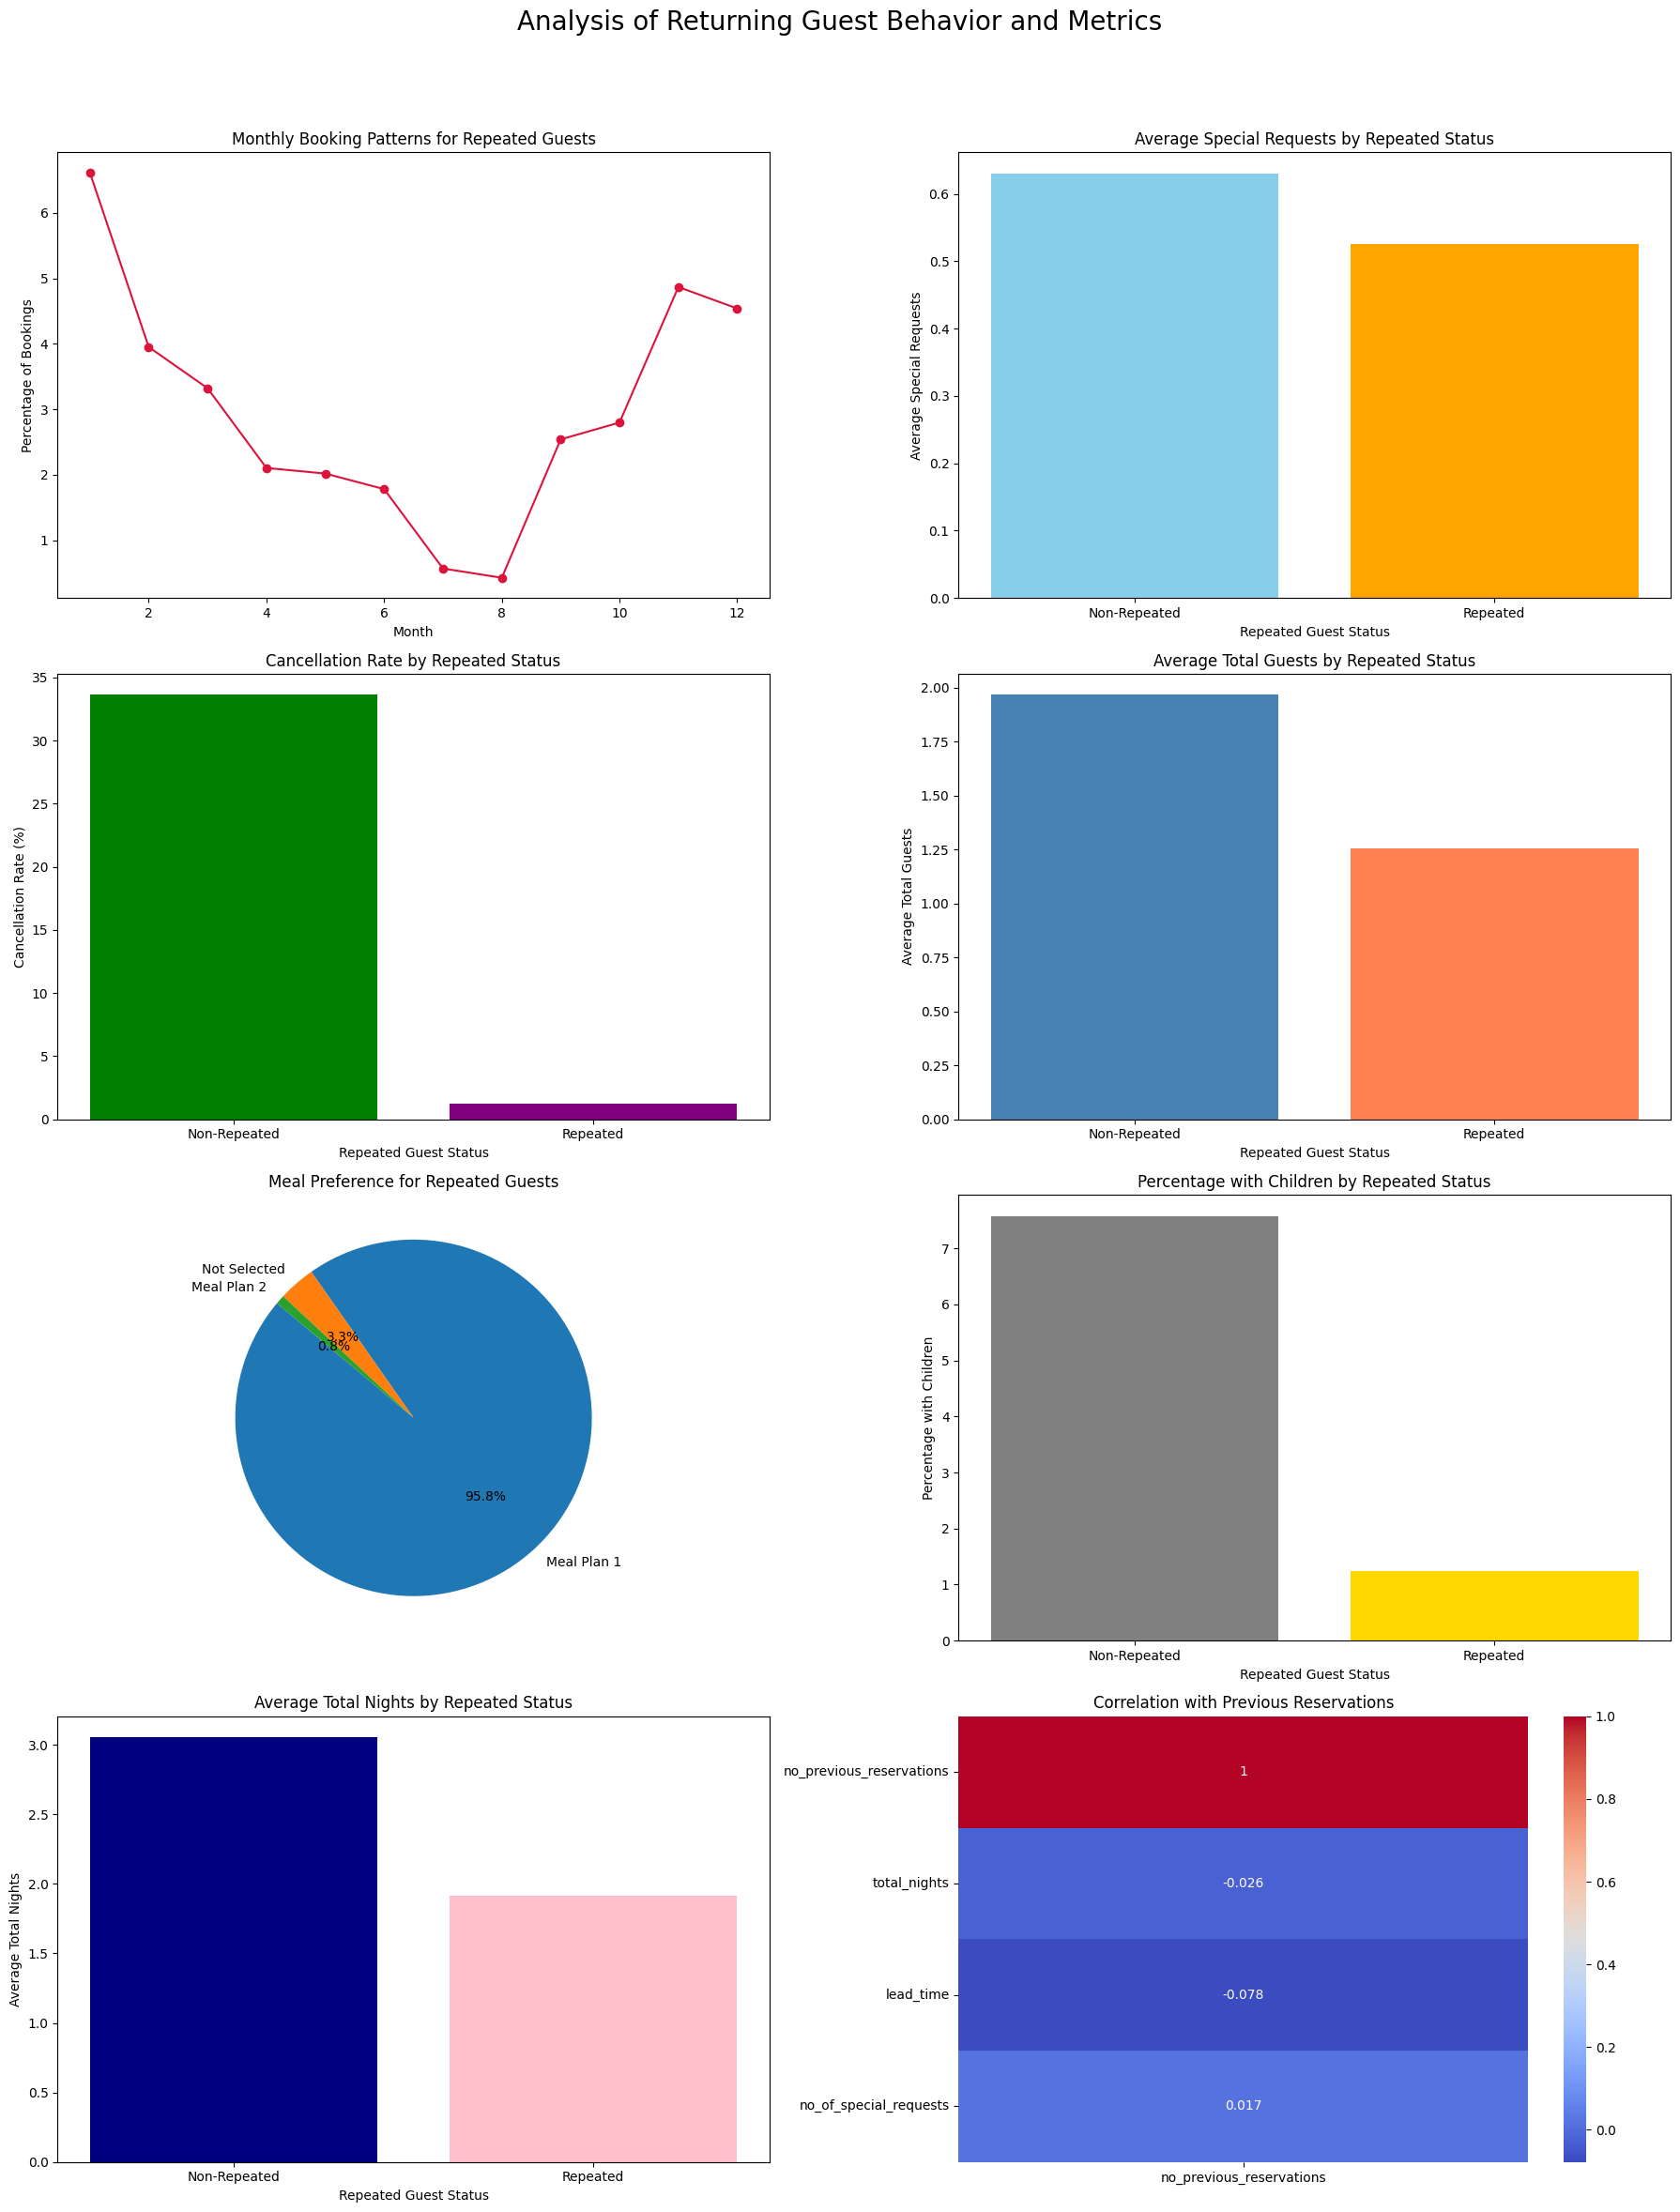

In [63]:
# AI Generated Mainly


# Set up figure size and layout
fig, axes = plt.subplots(4, 2, figsize=(18, 24))
fig.suptitle('Analysis of Returning Guest Behavior and Metrics', fontsize=20)

# 1. Monthly Booking Patterns for Repeated Guests (Line Chart)
axes[0, 0].plot(repeated_guest_analysis_results["Monthly Booking for Repeated Guests (%)"].index, 
                repeated_guest_analysis_results["Monthly Booking for Repeated Guests (%)"].values, marker='o', color='crimson')
axes[0, 0].set_title('Monthly Booking Patterns for Repeated Guests')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Percentage of Bookings')

# 2. Average Special Requests by Repeated Status (Bar Chart)
axes[0, 1].bar(repeated_guest_analysis_results["Avg Special Requests by Repeated Status"].index, 
               repeated_guest_analysis_results["Avg Special Requests by Repeated Status"].values, color=['skyblue', 'orange'])
axes[0, 1].set_title('Average Special Requests by Repeated Status')
axes[0, 1].set_xlabel('Repeated Guest Status')
axes[0, 1].set_ylabel('Average Special Requests')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['Non-Repeated', 'Repeated'])

# 3. Cancellation Rate by Repeated Status (Bar Chart)
axes[1, 0].bar(repeated_guest_analysis_results["Cancellation Rate by Repeated Status"].index, 
               repeated_guest_analysis_results["Cancellation Rate by Repeated Status"].values, color=['green', 'purple'])
axes[1, 0].set_title('Cancellation Rate by Repeated Status')
axes[1, 0].set_xlabel('Repeated Guest Status')
axes[1, 0].set_ylabel('Cancellation Rate (%)')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Non-Repeated', 'Repeated'])

# 4. Average Total Guests by Repeated Status (Bar Chart)
axes[1, 1].bar(repeated_guest_analysis_results["Avg Total Guests by Repeated Status"].index, 
               repeated_guest_analysis_results["Avg Total Guests by Repeated Status"].values, color=['steelblue', 'coral'])
axes[1, 1].set_title('Average Total Guests by Repeated Status')
axes[1, 1].set_xlabel('Repeated Guest Status')
axes[1, 1].set_ylabel('Average Total Guests')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Non-Repeated', 'Repeated'])

# 5. Meal Preference for Repeated Guests (Pie Chart)
axes[2, 0].pie(repeated_guest_analysis_results["Meal Preference for Repeated Guests (%)"].values, 
               labels=repeated_guest_analysis_results["Meal Preference for Repeated Guests (%)"].index, autopct='%1.1f%%', startangle=140)
axes[2, 0].set_title('Meal Preference for Repeated Guests')

# 6. Has Children by Repeated Status (Bar Chart)
axes[2, 1].bar(repeated_guest_analysis_results["Has Children by Repeated Status (%)"].index, 
               repeated_guest_analysis_results["Has Children by Repeated Status (%)"].values, color=['grey', 'gold'])
axes[2, 1].set_title('Percentage with Children by Repeated Status')
axes[2, 1].set_xlabel('Repeated Guest Status')
axes[2, 1].set_ylabel('Percentage with Children')
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['Non-Repeated', 'Repeated'])

# 7. Average Total Nights by Repeated Status (Bar Chart)
axes[3, 0].bar(repeated_guest_analysis_results["Avg Total Nights by Repeated Status"].index, 
               repeated_guest_analysis_results["Avg Total Nights by Repeated Status"].values, color=['navy', 'pink'])
axes[3, 0].set_title('Average Total Nights by Repeated Status')
axes[3, 0].set_xlabel('Repeated Guest Status')
axes[3, 0].set_ylabel('Average Total Nights')
axes[3, 0].set_xticks([0, 1])
axes[3, 0].set_xticklabels(['Non-Repeated', 'Repeated'])

# 8. Correlation Heatmap for Previous Reservations
corr_matrix = repeated_guest_analysis_results["Correlation with Previous Reservations"].to_frame()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[3, 1])
axes[3, 1].set_title('Correlation with Previous Reservations')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title space
plt.show()


<Figure size 1200x800 with 0 Axes>

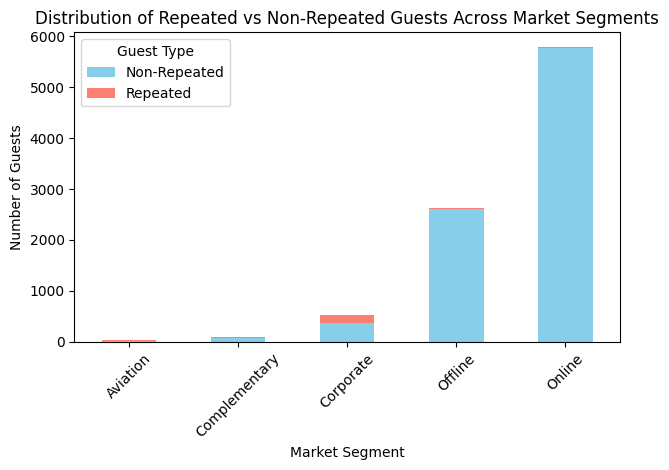

In [64]:
market_segment_repeated_counts = df.groupby(['market_segment_type', 'repeated_guest']).size().unstack()

plt.figure(figsize=(12, 8))
market_segment_repeated_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Distribution of Repeated vs Non-Repeated Guests Across Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Number of Guests')
plt.legend(['Non-Repeated', 'Repeated'], title='Guest Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


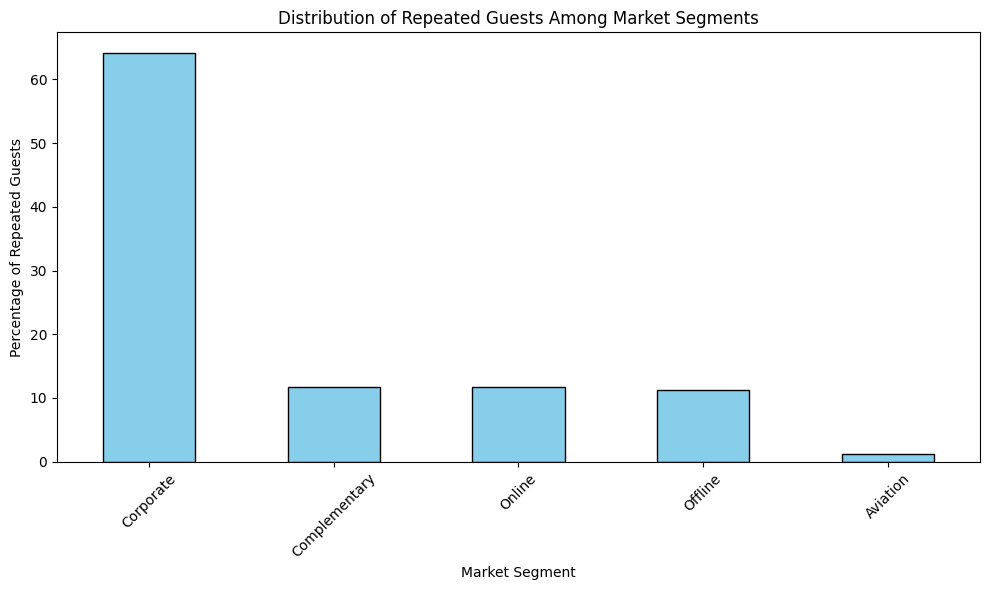

In [65]:
repeated_guests = df[df['repeated_guest'] == 1]

# Calculate the distribution of repeated guests among market segments
repeated_guests_distribution = repeated_guests['market_segment_type'].value_counts(normalize=True) * 100  # Convert to percentage

# Plot the distribution
plt.figure(figsize=(10, 6))
repeated_guests_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Repeated Guests Among Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Percentage of Repeated Guests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Repeated guests tend to book more at the start and end of the year
- Very tiny-bit more likely to make a special request
- Less likely to cancel their requests
- Less average total nights, and less average total guests
- Repeated guests are mainly corporate guests, which also makes sense while keeping in mind the previous insights

## Number of Special Requests

In [66]:
cancellation_rate_by_requests = df.groupby('no_of_special_requests')['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)

avg_previous_reservations_by_requests = df.groupby('no_of_special_requests')['no_previous_reservations'].mean()

avg_total_guests_by_requests = df.groupby('no_of_special_requests')['total_guests'].mean()

has_children_by_requests = df.groupby('no_of_special_requests')['has_children'].mean() * 100  # Percentage with children

avg_price_per_room_by_requests = df.groupby('no_of_special_requests')['avg_price_per_room'].mean()
avg_price_per_person_by_requests = df.groupby('no_of_special_requests')['avg_price_per_person_per_night'].mean()

car_parking_by_requests = df.groupby('no_of_special_requests')['required_car_parking_space'].mean() * 100  # Percentage requiring parking

avg_total_nights_by_requests = df.groupby('no_of_special_requests')['total_nights'].mean()

avg_lead_time_by_requests = df.groupby('no_of_special_requests')['lead_time'].mean()

avg_special_requests_by_segment = df.groupby('market_segment_type')['no_of_special_requests'].mean()

special_requests_analysis_results = {
    "Cancellation Rate by Requests": cancellation_rate_by_requests,
    "Avg Previous Reservations by Requests": avg_previous_reservations_by_requests,
    "Avg Total Guests by Requests": avg_total_guests_by_requests,
    "Has Children by Requests (%)": has_children_by_requests,
    "Avg Price per Room by Requests": avg_price_per_room_by_requests,
    "Avg Price per Person by Requests": avg_price_per_person_by_requests,
    "Car Parking by Requests (%)": car_parking_by_requests,
    "Avg Total Nights by Requests": avg_total_nights_by_requests,
    "Avg Lead Time by Requests": avg_lead_time_by_requests,
    "Avg Special Requests by Segment": avg_special_requests_by_segment
}

In [67]:
df.no_of_special_requests.apply(bool).value_counts() * 100 /len(df)

no_of_special_requests
False    53.614391
True     46.385609
Name: count, dtype: float64

In [68]:
df[df.no_of_special_requests.apply(bool)].booking_status.value_counts() * 100 / len(df[df.no_of_special_requests.apply(bool)])

booking_status
Not_Canceled    79.609803
Canceled        20.390197
Name: count, dtype: float64

In [69]:
df[~df.no_of_special_requests.apply(bool)].booking_status.value_counts() * 100 / len(df[~df.no_of_special_requests.apply(bool)])

booking_status
Not_Canceled    56.525319
Canceled        43.474681
Name: count, dtype: float64

In [70]:
# pprint(special_requests_analysis_results)

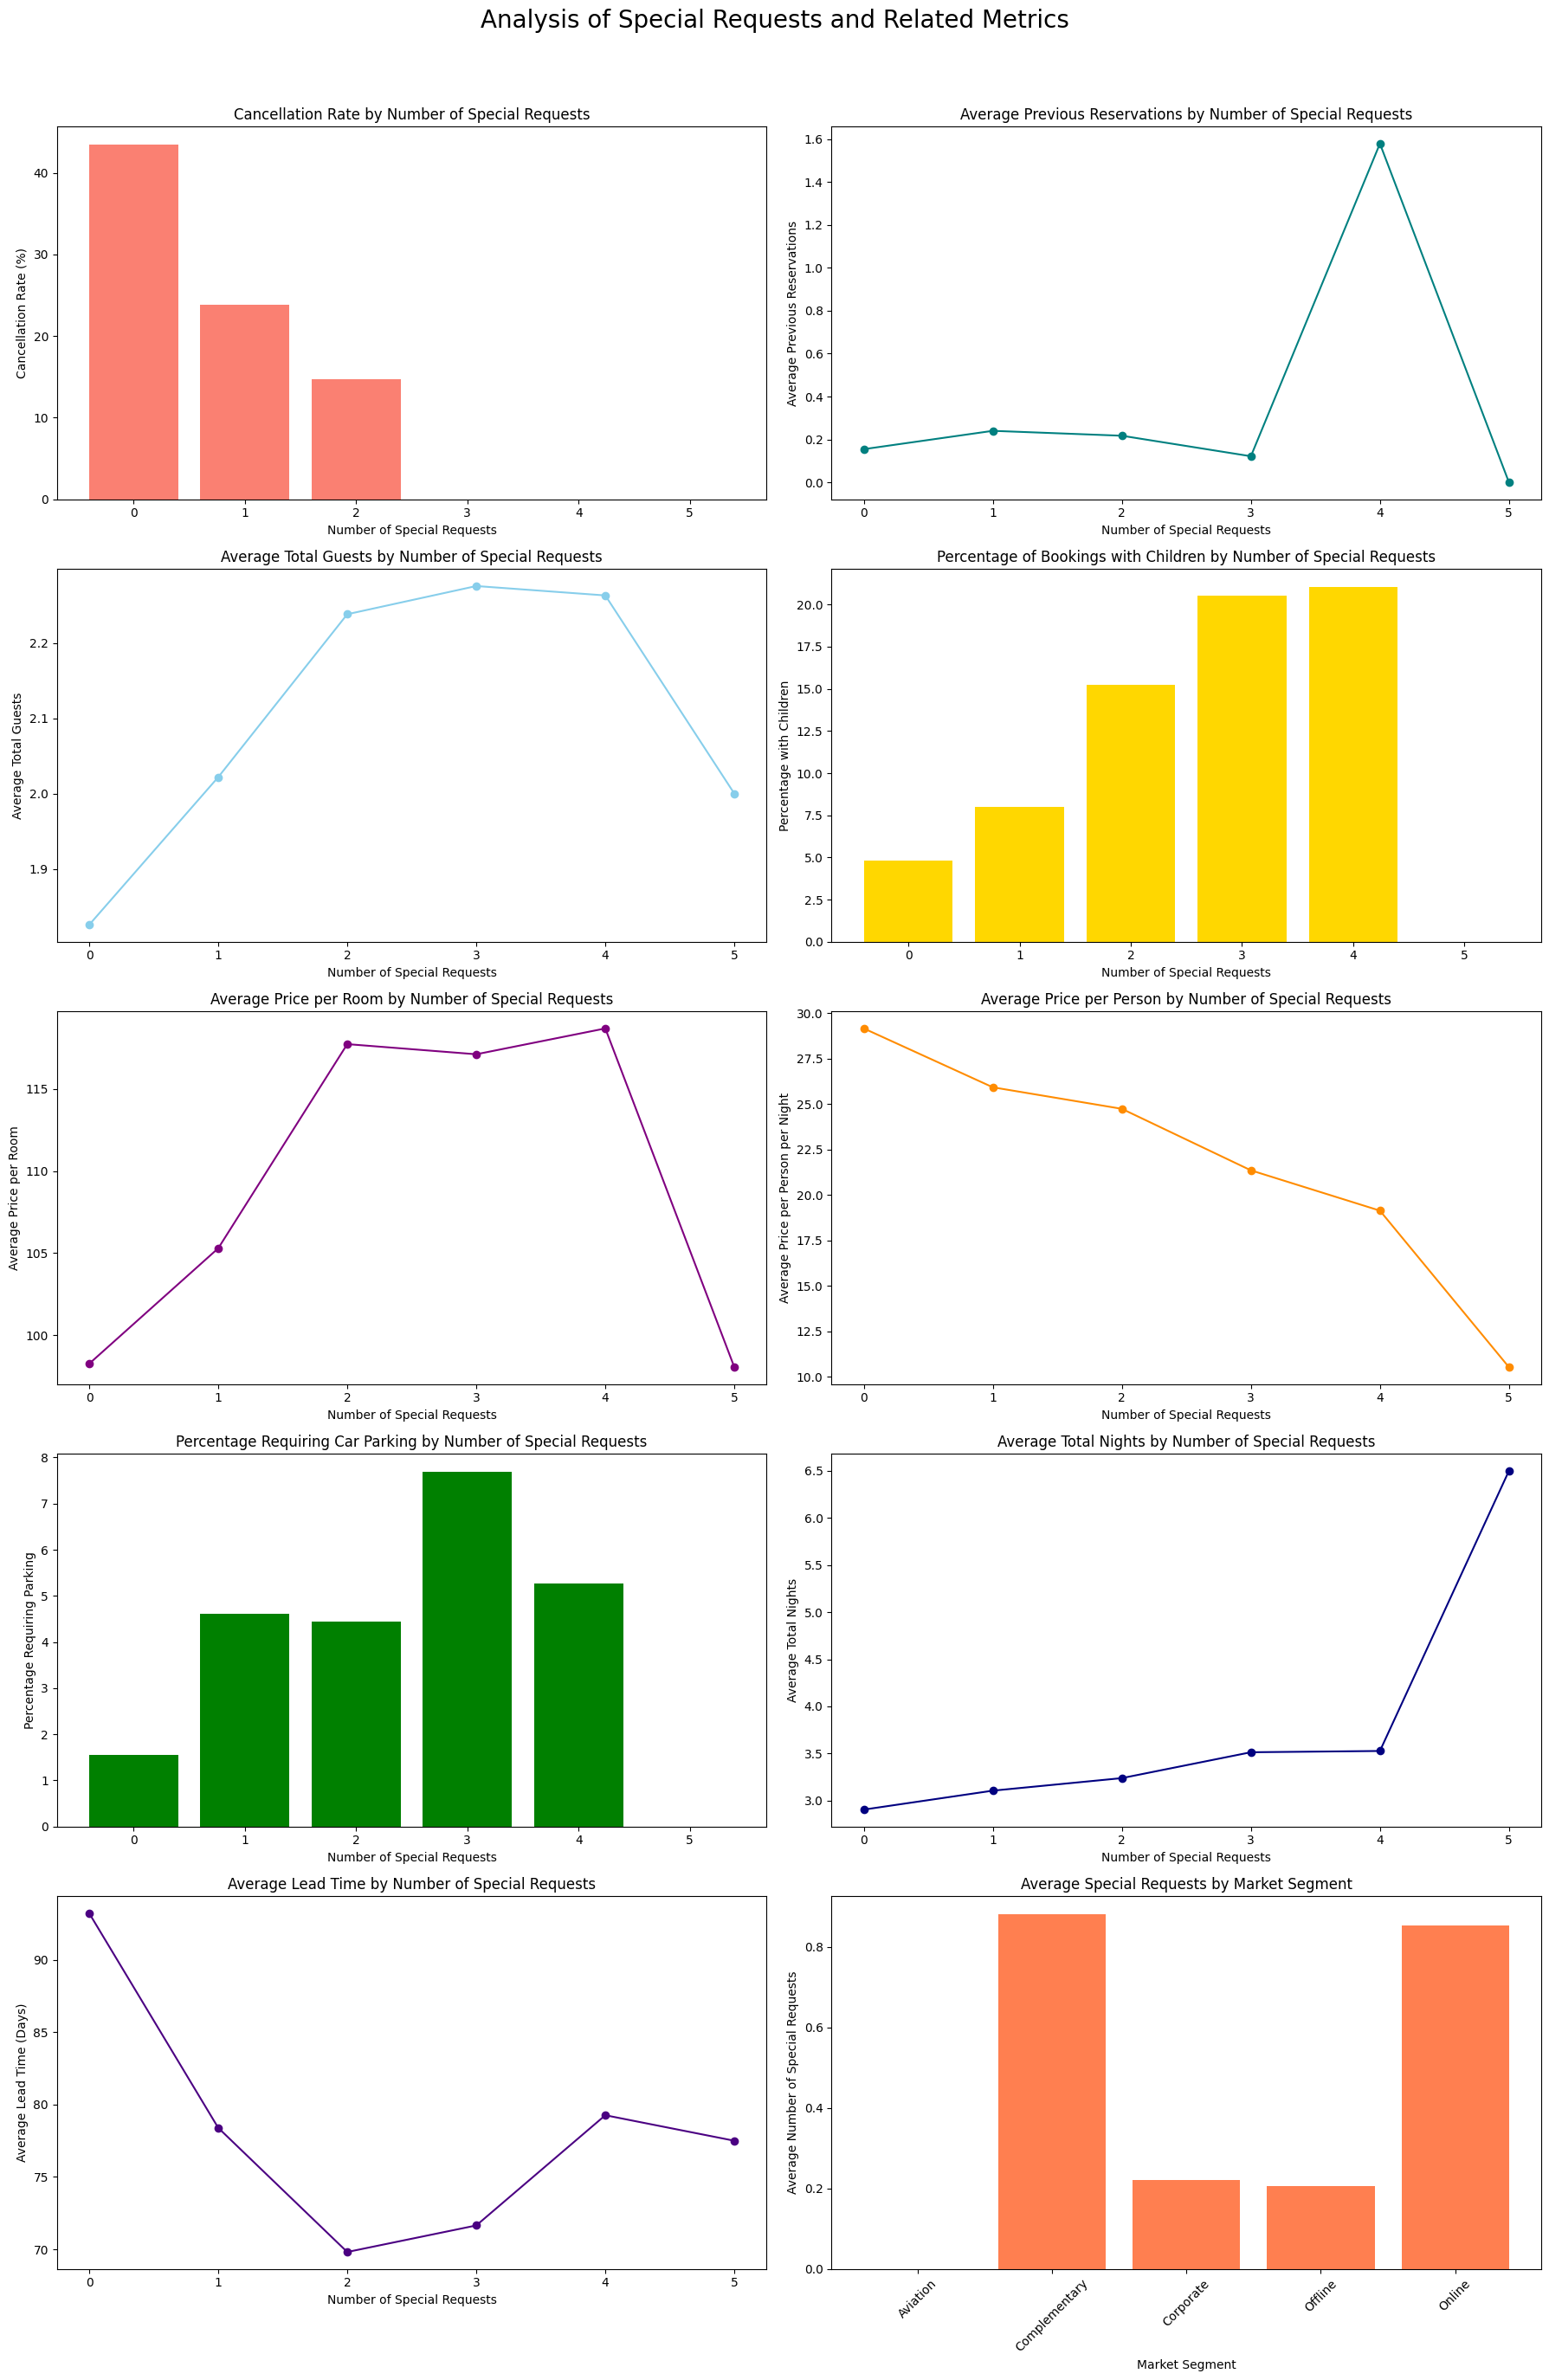

In [71]:
# Mainly AI Generated


fig, axes = plt.subplots(5, 2, figsize=(18, 28))
fig.suptitle('Analysis of Special Requests and Related Metrics', fontsize=20)

# 1. Cancellation Rate by Requests (Bar Chart)
axes[0, 0].bar(special_requests_analysis_results["Cancellation Rate by Requests"].index, 
               special_requests_analysis_results["Cancellation Rate by Requests"].values, color='salmon')
axes[0, 0].set_title('Cancellation Rate by Number of Special Requests')
axes[0, 0].set_xlabel('Number of Special Requests')
axes[0, 0].set_ylabel('Cancellation Rate (%)')

# 2. Average Previous Reservations by Requests (Line Chart)
axes[0, 1].plot(special_requests_analysis_results["Avg Previous Reservations by Requests"].index, 
                special_requests_analysis_results["Avg Previous Reservations by Requests"].values, marker='o', color='teal')
axes[0, 1].set_title('Average Previous Reservations by Number of Special Requests')
axes[0, 1].set_xlabel('Number of Special Requests')
axes[0, 1].set_ylabel('Average Previous Reservations')

# 3. Average Total Guests by Requests (Line Chart)
axes[1, 0].plot(special_requests_analysis_results["Avg Total Guests by Requests"].index, 
                special_requests_analysis_results["Avg Total Guests by Requests"].values, marker='o', color='skyblue')
axes[1, 0].set_title('Average Total Guests by Number of Special Requests')
axes[1, 0].set_xlabel('Number of Special Requests')
axes[1, 0].set_ylabel('Average Total Guests')

# 4. Percentage with Children by Requests (Bar Chart)
axes[1, 1].bar(special_requests_analysis_results["Has Children by Requests (%)"].index, 
               special_requests_analysis_results["Has Children by Requests (%)"].values, color='gold')
axes[1, 1].set_title('Percentage of Bookings with Children by Number of Special Requests')
axes[1, 1].set_xlabel('Number of Special Requests')
axes[1, 1].set_ylabel('Percentage with Children')

# 5. Average Price per Room by Requests (Line Chart)
axes[2, 0].plot(special_requests_analysis_results["Avg Price per Room by Requests"].index, 
                special_requests_analysis_results["Avg Price per Room by Requests"].values, marker='o', color='purple')
axes[2, 0].set_title('Average Price per Room by Number of Special Requests')
axes[2, 0].set_xlabel('Number of Special Requests')
axes[2, 0].set_ylabel('Average Price per Room')

# 6. Average Price per Person by Requests (Line Chart)
axes[2, 1].plot(special_requests_analysis_results["Avg Price per Person by Requests"].index, 
                special_requests_analysis_results["Avg Price per Person by Requests"].values, marker='o', color='darkorange')
axes[2, 1].set_title('Average Price per Person by Number of Special Requests')
axes[2, 1].set_xlabel('Number of Special Requests')
axes[2, 1].set_ylabel('Average Price per Person per Night')

# 7. Car Parking by Requests (Bar Chart)
axes[3, 0].bar(special_requests_analysis_results["Car Parking by Requests (%)"].index, 
               special_requests_analysis_results["Car Parking by Requests (%)"].values, color='green')
axes[3, 0].set_title('Percentage Requiring Car Parking by Number of Special Requests')
axes[3, 0].set_xlabel('Number of Special Requests')
axes[3, 0].set_ylabel('Percentage Requiring Parking')

# 8. Average Total Nights by Requests (Line Chart)
axes[3, 1].plot(special_requests_analysis_results["Avg Total Nights by Requests"].index, 
                special_requests_analysis_results["Avg Total Nights by Requests"].values, marker='o', color='navy')
axes[3, 1].set_title('Average Total Nights by Number of Special Requests')
axes[3, 1].set_xlabel('Number of Special Requests')
axes[3, 1].set_ylabel('Average Total Nights')

# 9. Average Lead Time by Requests (Line Chart)
axes[4, 0].plot(special_requests_analysis_results["Avg Lead Time by Requests"].index, 
                special_requests_analysis_results["Avg Lead Time by Requests"].values, marker='o', color='indigo')
axes[4, 0].set_title('Average Lead Time by Number of Special Requests')
axes[4, 0].set_xlabel('Number of Special Requests')
axes[4, 0].set_ylabel('Average Lead Time (Days)')

# 10. Special Requests by Market Segment (Bar Chart)
axes[4, 1].bar(special_requests_analysis_results["Avg Special Requests by Segment"].index, 
               special_requests_analysis_results["Avg Special Requests by Segment"].values, color='coral')
axes[4, 1].set_title('Average Special Requests by Market Segment')
axes[4, 1].set_xlabel('Market Segment')
axes[4, 1].set_ylabel('Average Number of Special Requests')
axes[4, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title space
plt.show()


C:\Users\kashe\AppData\Local\Temp\ipykernel_34960\3630836163.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not Canceled', 'Canceled'])
C:\Users\kashe\AppData\Local\Temp\ipykernel_34960\3630836163.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['Not Canceled', 'Canceled'])


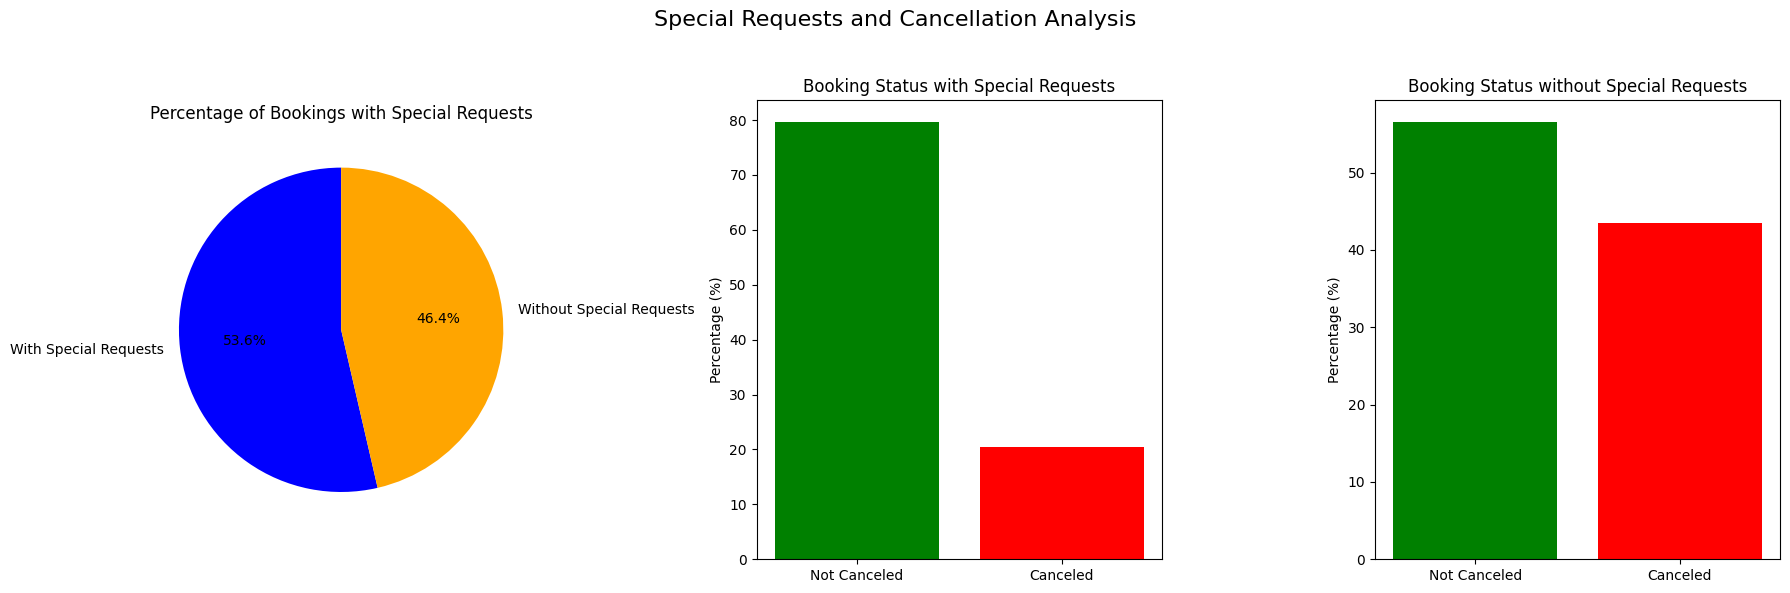

In [72]:

percent_special_requests = df.no_of_special_requests.apply(bool).value_counts(normalize=True) * 100

percent_cancellation_with_requests = df[df.no_of_special_requests.apply(bool)].booking_status.value_counts(normalize=True) * 100

percent_cancellation_without_requests = df[~df.no_of_special_requests.apply(bool)].booking_status.value_counts(normalize=True) * 100


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Special Requests and Cancellation Analysis', fontsize=16)

# Plot 1: Percent of Data with and without Special Requests (Pie Chart)
axes[0].pie(percent_special_requests.values, labels=['With Special Requests', 'Without Special Requests'], autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
axes[0].set_title('Percentage of Bookings with Special Requests')


# Plot 2: Percent of Cancellations with Special Requests
axes[1].bar(percent_cancellation_with_requests.index, percent_cancellation_with_requests.values, color=['green', 'red'])
axes[1].set_title('Booking Status with Special Requests')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xticklabels(['Not Canceled', 'Canceled'])

# Plot 3: Percent of Cancellations without Special Requests
axes[2].bar(percent_cancellation_without_requests.index, percent_cancellation_without_requests.values, color=['green', 'red'])
axes[2].set_title('Booking Status without Special Requests')
axes[2].set_ylabel('Percentage (%)')
axes[2].set_xticklabels(['Not Canceled', 'Canceled'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- Approximately 47% of bookings have special requests
- There’s a positive correlation between the number of special requests and the count of previous reservations. Frequent guests tend to make more special requests, likely because they are familiar with the hotel's services and feel more comfortable asking for customizations.
- Larger groups are more likely to make a higher number of special requests.
- Bookings that include children often have a higher number of special requests.
-  Higher average room rates and per-person rates are associated with increased special requests, indicating that premium-paying guests may expect more personalized services.
-  Guests who request car parking often make more special requests overall.
-  Longer stays are associated with more special requests.
-  People with special requests have an average of 20% cancellation rate, which is lower than the 43% cancellation rate when no special requests were present.

## Lead Time Analysis

In [73]:
# Slightly removing the high outliers for this study at least now.
lead_time_cutoff = np.percentile(df['lead_time'], 95)
lead_time_df = df[df['lead_time'] <= lead_time_cutoff].copy()

# Lead time bins for grouping
lead_time_bins = pd.cut(lead_time_df['lead_time'], bins=10)

cancellation_rate_by_lead_time = lead_time_df.groupby(lead_time_bins, observed=False)['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)

avg_lead_time_with_children = lead_time_df.groupby('has_children', observed=False)['lead_time'].mean()

avg_lead_time_by_total_guests = lead_time_df.groupby('total_guests', observed=False)['lead_time'].mean()

avg_lead_time_by_month = lead_time_df.groupby('arrival_month', observed=False)['lead_time'].mean()

avg_price_per_room_by_lead_time = lead_time_df.groupby(lead_time_bins, observed=False)['avg_price_per_room'].mean()
avg_price_per_person_by_lead_time = lead_time_df.groupby(lead_time_bins, observed=False)['avg_price_per_person_per_night'].mean()

avg_total_nights_by_lead_time = lead_time_df.groupby(lead_time_bins, observed=False)['total_nights'].mean()

conversion_rate_by_lead_time = lead_time_df.groupby(lead_time_bins, observed=False)['booking_status'].apply(lambda x: (x == 'Not_Canceled').mean() * 100)

lead_time_analysis_results = {
    "Cancellation Rate by Lead Time": cancellation_rate_by_lead_time,
    "Avg Lead Time with Children": avg_lead_time_with_children,
    "Avg Lead Time by Total Guests": avg_lead_time_by_total_guests,
    "Avg Lead Time by Month": avg_lead_time_by_month,
    "Avg Price per Room by Lead Time": avg_price_per_room_by_lead_time,
    "Avg Price per Person by Lead Time": avg_price_per_person_by_lead_time,
    "Avg Total Nights by Lead Time": avg_total_nights_by_lead_time,
    "Conversion Rate by Lead Time": conversion_rate_by_lead_time
}


In [74]:
# pprint(lead_time_analysis_results)

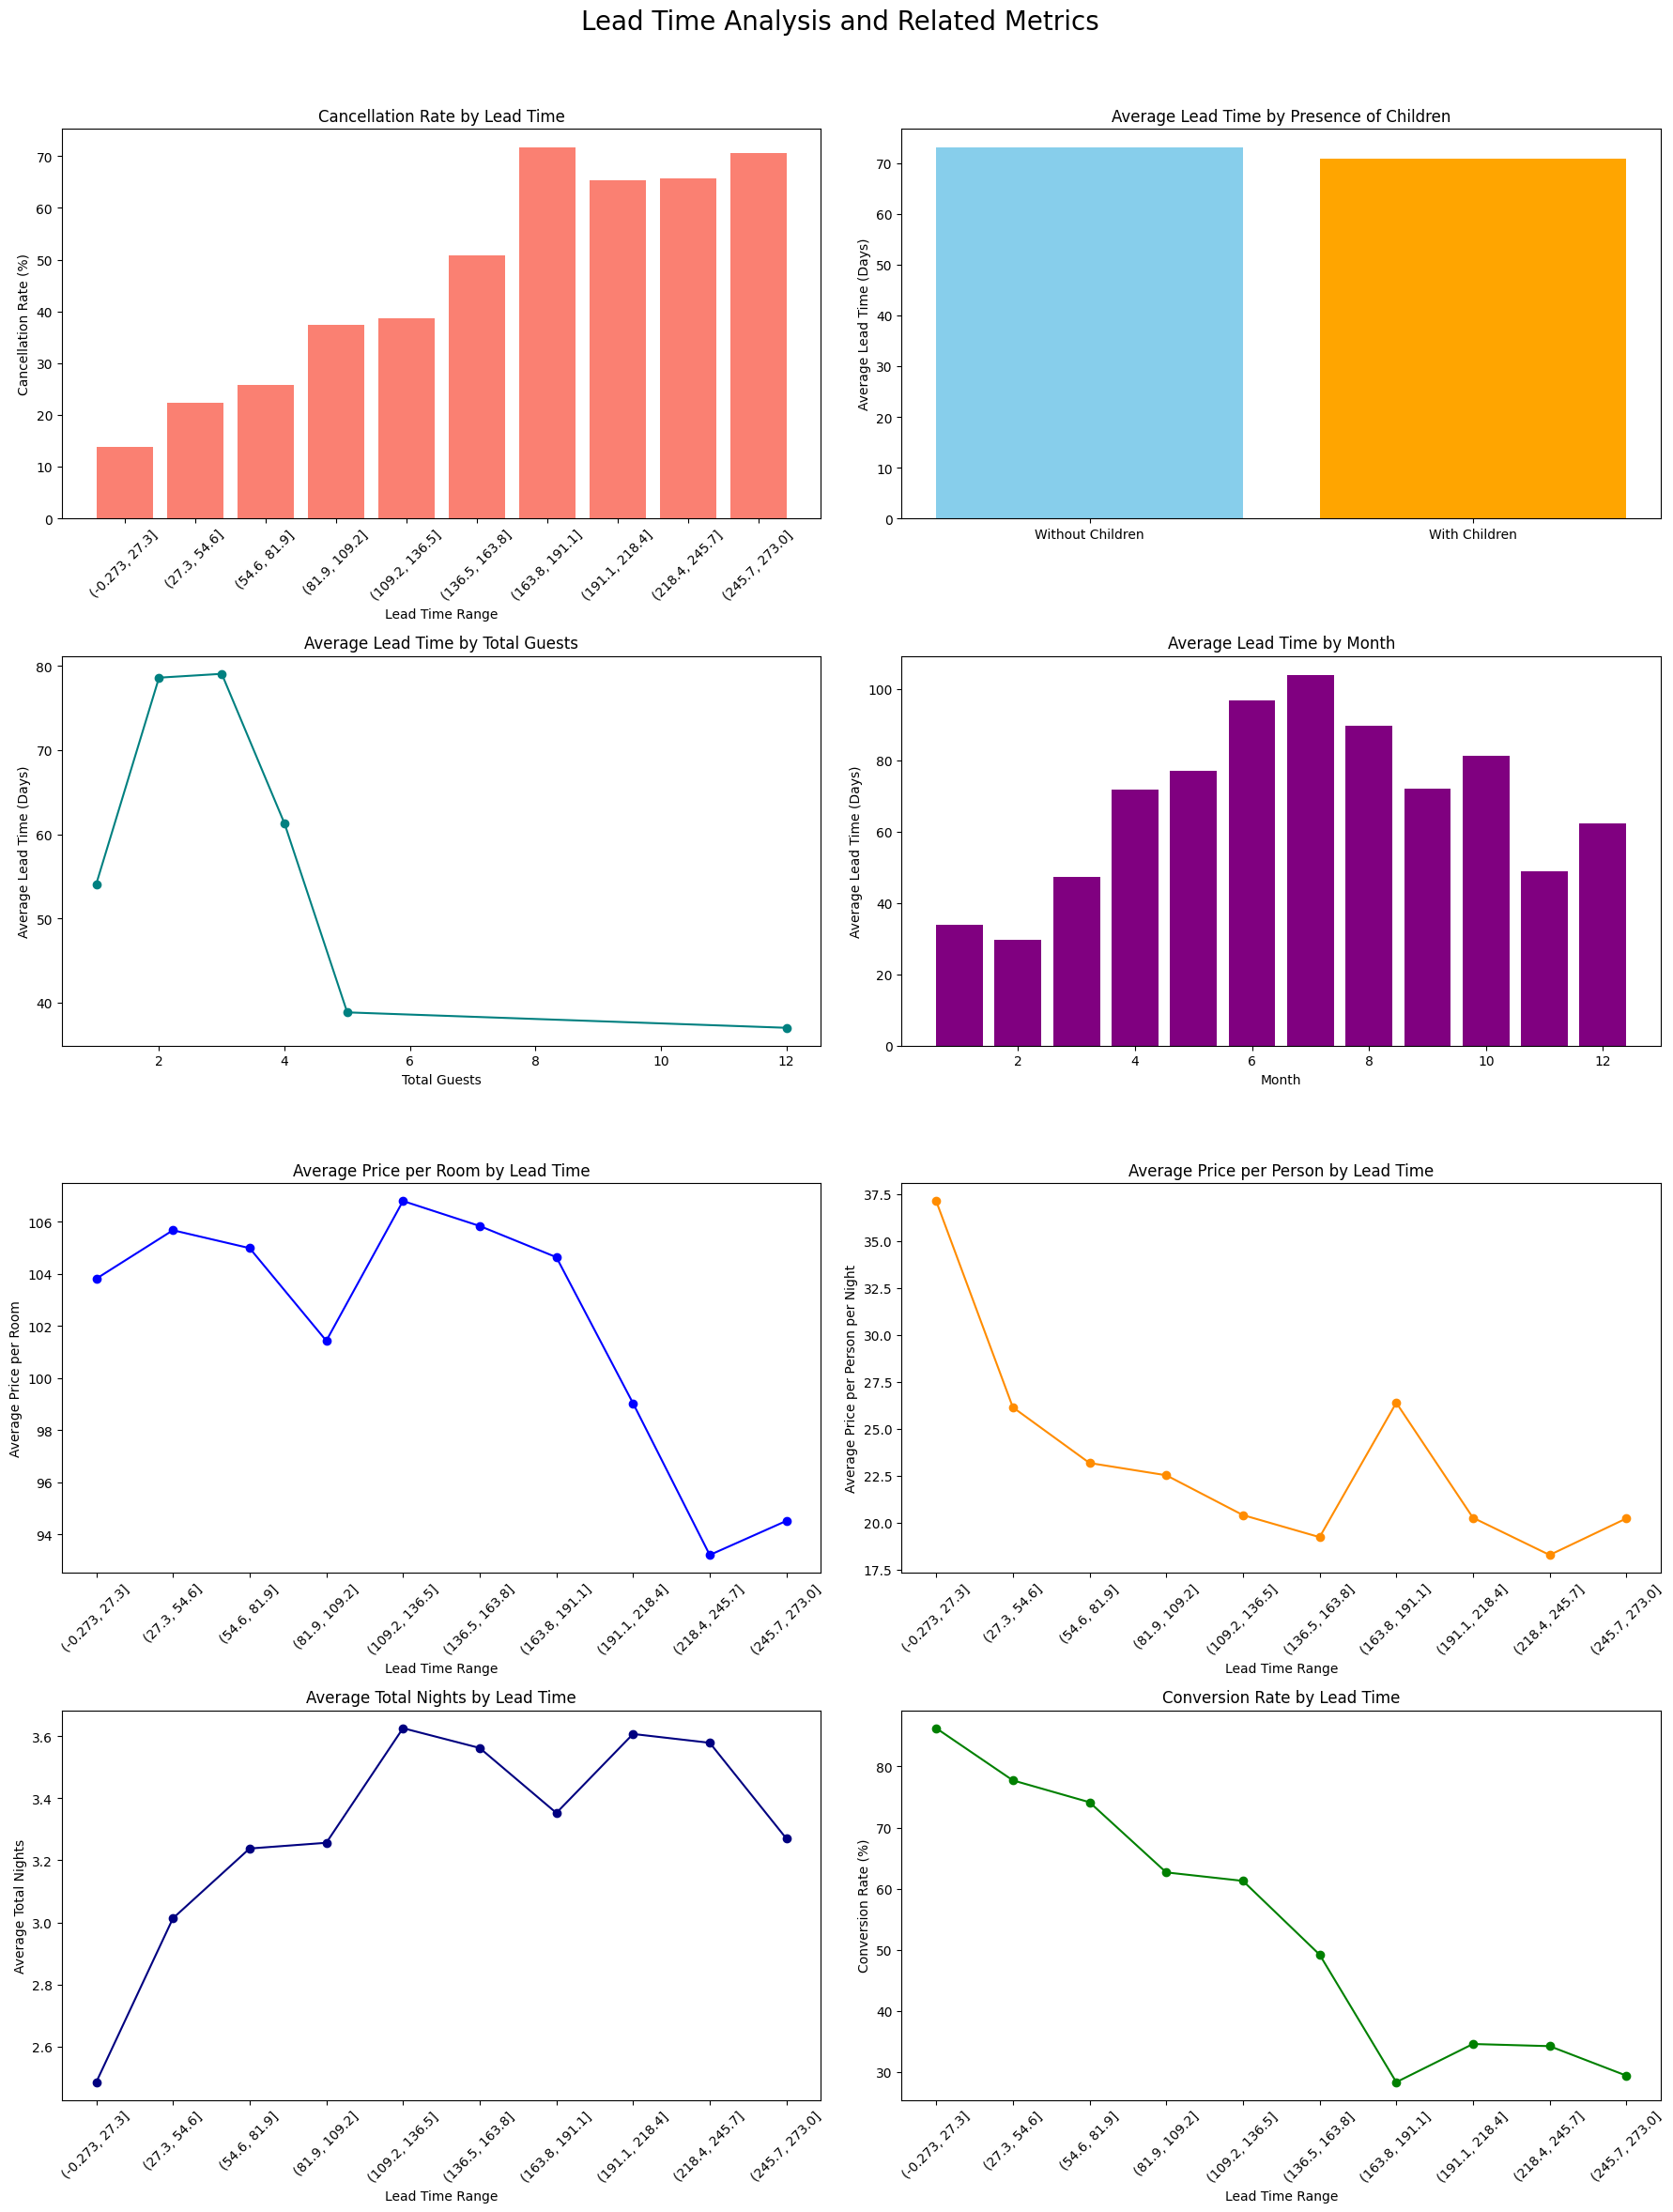

In [75]:
# Mainly AI Generated

# Setting up the figure layout
fig, axes = plt.subplots(4, 2, figsize=(18, 24))
fig.suptitle('Lead Time Analysis and Related Metrics', fontsize=20)

# 1. Cancellation Rate by Lead Time (Bar Chart)
axes[0, 0].bar(lead_time_analysis_results["Cancellation Rate by Lead Time"].index.astype(str), 
               lead_time_analysis_results["Cancellation Rate by Lead Time"].values, color='salmon')
axes[0, 0].set_title('Cancellation Rate by Lead Time')
axes[0, 0].set_xlabel('Lead Time Range')
axes[0, 0].set_ylabel('Cancellation Rate (%)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Average Lead Time with Children (Bar Chart)
axes[0, 1].bar(['Without Children', 'With Children'], lead_time_analysis_results["Avg Lead Time with Children"].values, color=['skyblue', 'orange'])
axes[0, 1].set_title('Average Lead Time by Presence of Children')
axes[0, 1].set_ylabel('Average Lead Time (Days)')

# 3. Average Lead Time by Total Guests (Line Chart)
axes[1, 0].plot(lead_time_analysis_results["Avg Lead Time by Total Guests"].index, 
                lead_time_analysis_results["Avg Lead Time by Total Guests"].values, marker='o', color='teal')
axes[1, 0].set_title('Average Lead Time by Total Guests')
axes[1, 0].set_xlabel('Total Guests')
axes[1, 0].set_ylabel('Average Lead Time (Days)')

# 4. Average Lead Time by Month (Bar Chart)
axes[1, 1].bar(lead_time_analysis_results["Avg Lead Time by Month"].index, 
               lead_time_analysis_results["Avg Lead Time by Month"].values, color='purple')
axes[1, 1].set_title('Average Lead Time by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average Lead Time (Days)')

# 5. Average Price per Room by Lead Time (Line Chart)
axes[2, 0].plot(lead_time_analysis_results["Avg Price per Room by Lead Time"].index.astype(str), 
                lead_time_analysis_results["Avg Price per Room by Lead Time"].values, marker='o', color='blue')
axes[2, 0].set_title('Average Price per Room by Lead Time')
axes[2, 0].set_xlabel('Lead Time Range')
axes[2, 0].set_ylabel('Average Price per Room')
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Average Price per Person by Lead Time (Line Chart)
axes[2, 1].plot(lead_time_analysis_results["Avg Price per Person by Lead Time"].index.astype(str), 
                lead_time_analysis_results["Avg Price per Person by Lead Time"].values, marker='o', color='darkorange')
axes[2, 1].set_title('Average Price per Person by Lead Time')
axes[2, 1].set_xlabel('Lead Time Range')
axes[2, 1].set_ylabel('Average Price per Person per Night')
axes[2, 1].tick_params(axis='x', rotation=45)

# 7. Average Total Nights by Lead Time (Line Chart)
axes[3, 0].plot(lead_time_analysis_results["Avg Total Nights by Lead Time"].index.astype(str), 
                lead_time_analysis_results["Avg Total Nights by Lead Time"].values, marker='o', color='navy')
axes[3, 0].set_title('Average Total Nights by Lead Time')
axes[3, 0].set_xlabel('Lead Time Range')
axes[3, 0].set_ylabel('Average Total Nights')
axes[3, 0].tick_params(axis='x', rotation=45)

# 8. Conversion Rate by Lead Time (Line Chart)
axes[3, 1].plot(lead_time_analysis_results["Conversion Rate by Lead Time"].index.astype(str), 
                lead_time_analysis_results["Conversion Rate by Lead Time"].values, marker='o', color='green')
axes[3, 1].set_title('Conversion Rate by Lead Time')
axes[3, 1].set_xlabel('Lead Time Range')
axes[3, 1].set_ylabel('Conversion Rate (%)')
axes[3, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title space
plt.show()


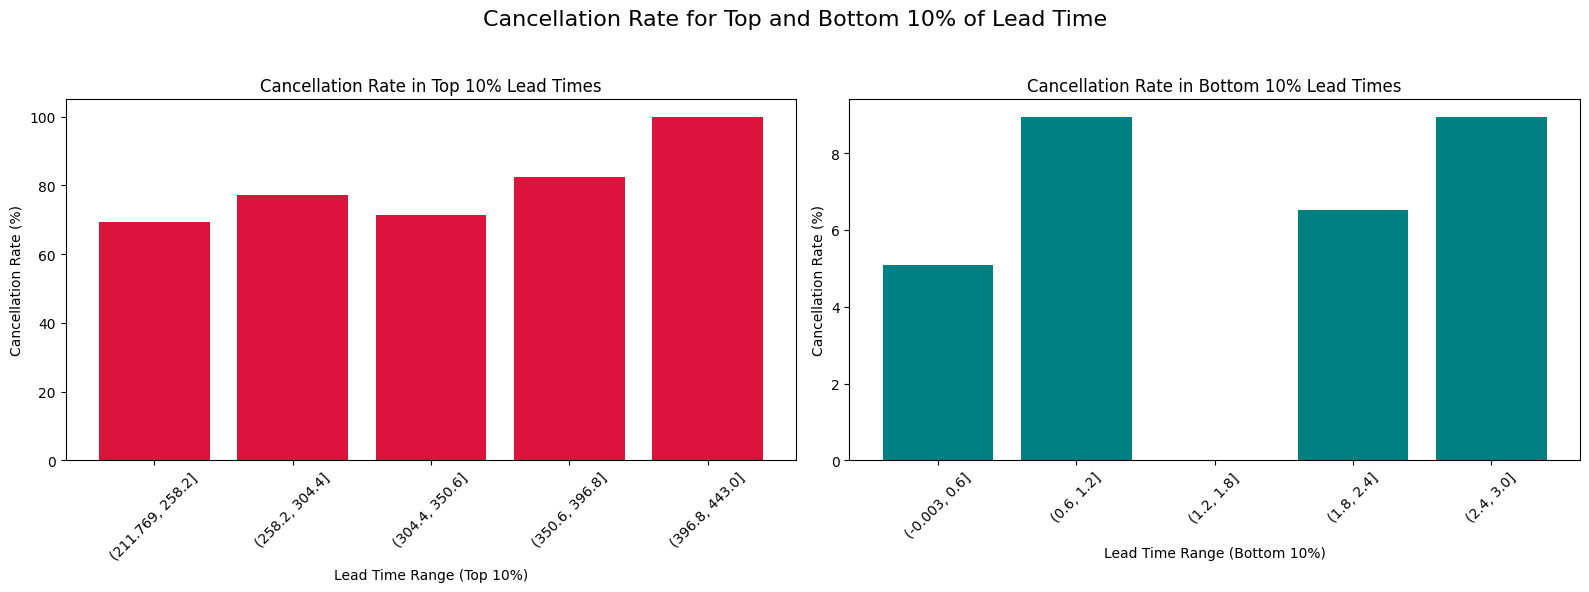

In [76]:
top_10_cutoff = np.percentile(df['lead_time'], 90)
bottom_10_cutoff = np.percentile(df['lead_time'], 10)

top_10_lead_time_df = df[df['lead_time'] >= top_10_cutoff].copy()
bottom_10_lead_time_df = df[df['lead_time'] <= bottom_10_cutoff].copy()

top_10_bins = pd.cut(top_10_lead_time_df['lead_time'], bins=5)
bottom_10_bins = pd.cut(bottom_10_lead_time_df['lead_time'], bins=5)

top_10_cancellation_rate = top_10_lead_time_df.groupby(top_10_bins, observed=False)['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)
bottom_10_cancellation_rate = bottom_10_lead_time_df.groupby(bottom_10_bins, observed=False)['booking_status'].apply(lambda x: (x == 'Canceled').mean() * 100)

# Plotting the cancellation rates for both top and bottom 10% lead time bins

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Cancellation Rate for Top and Bottom 10% of Lead Time', fontsize=16)

# Plot for top 10% lead times
axes[0].bar(top_10_cancellation_rate.index.astype(str), top_10_cancellation_rate.values, color='crimson')
axes[0].set_title('Cancellation Rate in Top 10% Lead Times')
axes[0].set_xlabel('Lead Time Range (Top 10%)')
axes[0].set_ylabel('Cancellation Rate (%)')
axes[0].tick_params(axis='x', rotation=45)

# Plot for bottom 10% lead times
axes[1].bar(bottom_10_cancellation_rate.index.astype(str), bottom_10_cancellation_rate.values, color='teal')
axes[1].set_title('Cancellation Rate in Bottom 10% Lead Times')
axes[1].set_xlabel('Lead Time Range (Bottom 10%)')
axes[1].set_ylabel('Cancellation Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


- The cancellation rate varies significantly across different lead time ranges. A key observation is that guests with longer lead times tend to cancel more often than those who book closer to their stay date.

- Bookings that include children generally show longer average lead times, suggesting that family travelers are likely to plan their trips further in advance. Larger groups tend to book further in advance. This pattern likely reflects the need for coordination when arranging group travel.

- Certain months have higher average lead times, likely due to peak travel seasons or holiday periods. For example, summer months or end-of-year holiday periods may show longer lead times as guests book vacations early.

- Longer lead times correlate with longer stays. Guests booking vacations or extended trips tend to plan well in advance to secure preferred dates and accommodations.

- Extremely long lead times (top 10%) show the highest cancellation rates, likely because these guests’ plans are less certain over such extended periods. or the intention was to cancel the trip

- The bottom 10% (shortest lead times) have low cancellation rates, indicating some reliability in the last-minute bookings.


## Revenues & Losses

In [77]:
total_revenue = df[df['booking_status'] == 'Not_Canceled']['avg_price_per_room'].sum()

total_loss = df[df['booking_status'] == 'Canceled']['avg_price_per_room'].sum()

revenue_by_requests = df[df['booking_status'] == 'Not_Canceled'].groupby('no_of_special_requests')['avg_price_per_room'].sum()
loss_by_requests = df[df['booking_status'] == 'Canceled'].groupby('no_of_special_requests')['avg_price_per_room'].sum()

revenue_by_children = df[df['booking_status'] == 'Not_Canceled'].groupby('has_children')['avg_price_per_room'].sum()
loss_by_children = df[df['booking_status'] == 'Canceled'].groupby('has_children')['avg_price_per_room'].sum()

df_2018 = df[df['arrival_year'] == 2018]
monthly_revenue_2018 = df_2018[df_2018['booking_status'] == 'Not_Canceled'].groupby('arrival_month')['avg_price_per_room'].sum()
monthly_loss_2018 = df_2018[df_2018['booking_status'] == 'Canceled'].groupby('arrival_month')['avg_price_per_room'].sum()

revenue_by_segment = df[df['booking_status'] == 'Not_Canceled'].groupby('market_segment_type')['avg_price_per_room'].sum()
loss_by_segment = df[df['booking_status'] == 'Canceled'].groupby('market_segment_type')['avg_price_per_room'].sum()

revenue_loss_results = {
    "Total Revenue (Non-Canceled)": total_revenue,
    "Total Loss (Canceled)": total_loss,
    "Revenue by Special Requests": revenue_by_requests,
    "Loss by Special Requests": loss_by_requests,
    "Revenue by Children Presence": revenue_by_children,
    "Loss by Children Presence": loss_by_children,
    "Monthly Revenue (2018)": monthly_revenue_2018,
    "Monthly Loss (2018)": monthly_loss_2018,
    "Revenue by Market Segment": revenue_by_segment,
    "Loss by Market Segment": loss_by_segment
}

In [78]:
# pprint(revenue_loss_results)

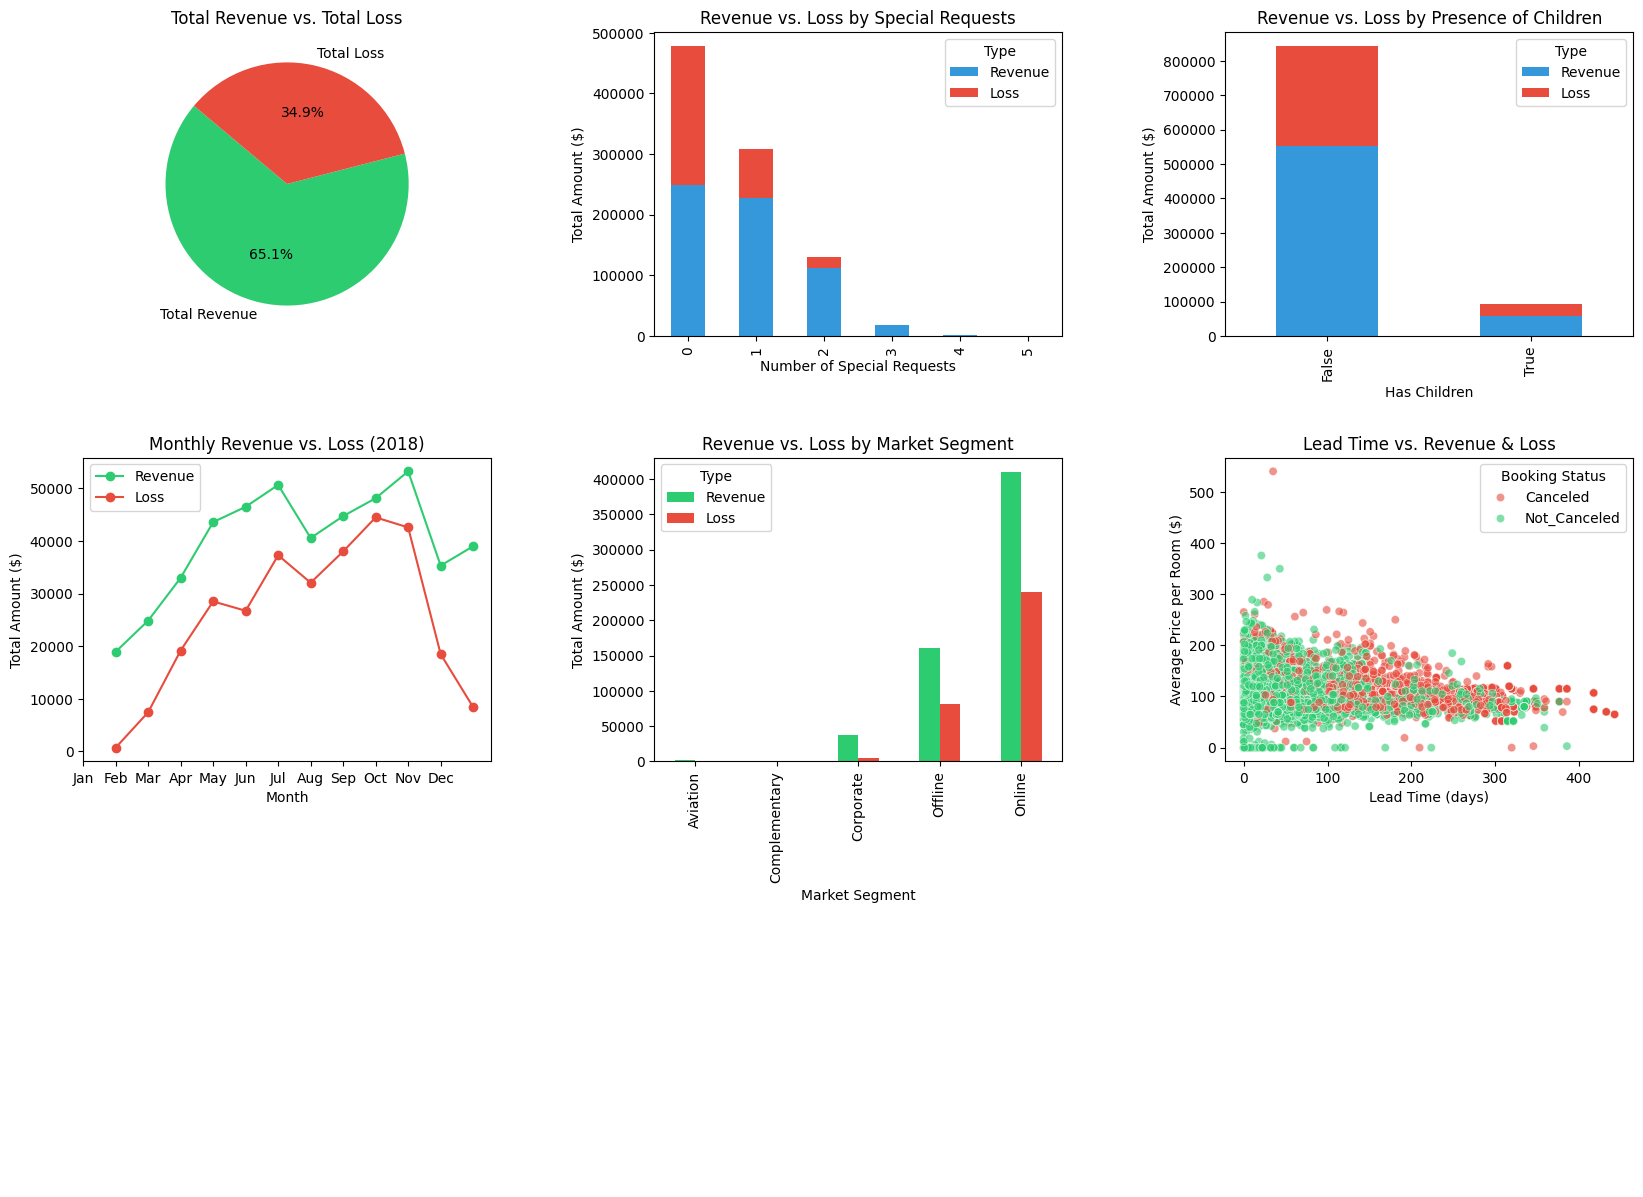

In [79]:
# Mainly AI Generated

# Initialize a large figure for the 3x3 grid layout of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# 1. Total Revenue and Total Loss (Pie Chart)
total_values = [revenue_loss_results["Total Revenue (Non-Canceled)"], revenue_loss_results["Total Loss (Canceled)"]]
axes[0, 0].pie(total_values, labels=["Total Revenue", "Total Loss"], autopct='%1.1f%%', startangle=140, colors=["#2ecc71", "#e74c3c"])
axes[0, 0].set_title("Total Revenue vs. Total Loss")

# 2. Revenue vs. Loss by Special Requests (Bar Plot)
special_requests_df = pd.DataFrame({
    'Revenue': revenue_loss_results["Revenue by Special Requests"],
    'Loss': revenue_loss_results["Loss by Special Requests"]
}).fillna(0)
special_requests_df.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'], ax=axes[0, 1])
axes[0, 1].set_title("Revenue vs. Loss by Special Requests")
axes[0, 1].set_xlabel("Number of Special Requests")
axes[0, 1].set_ylabel("Total Amount ($)")
axes[0, 1].legend(title="Type")

# 3. Revenue vs. Loss by Presence of Children (Bar Plot)
children_df = pd.DataFrame({
    'Revenue': revenue_loss_results["Revenue by Children Presence"],
    'Loss': revenue_loss_results["Loss by Children Presence"]
})
children_df.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'], ax=axes[0, 2])
axes[0, 2].set_title("Revenue vs. Loss by Presence of Children")
axes[0, 2].set_xlabel("Has Children")
axes[0, 2].set_ylabel("Total Amount ($)")
axes[0, 2].legend(title="Type")

# 4. Monthly Revenue and Loss for 2018 (Line Plot)
monthly_revenue_loss_df = pd.DataFrame({
    'Revenue': revenue_loss_results["Monthly Revenue (2018)"],
    'Loss': revenue_loss_results["Monthly Loss (2018)"]
})
monthly_revenue_loss_df.plot(kind='line', marker='o', ax=axes[1, 0], color=["#2ecc71", "#e74c3c"])
axes[1, 0].set_title("Monthly Revenue vs. Loss (2018)")
axes[1, 0].set_xlabel("Month")
axes[1, 0].set_ylabel("Total Amount ($)")
axes[1, 0].set_xticks(range(12))
axes[1, 0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# 5. Revenue vs. Loss by Market Segment (Clustered Bar Plot)
market_segment_df = pd.DataFrame({
    'Revenue': revenue_loss_results["Revenue by Market Segment"],
    'Loss': revenue_loss_results["Loss by Market Segment"]
}).fillna(0)
market_segment_df.plot(kind='bar', color=['#2ecc71', '#e74c3c'], ax=axes[1, 1])
axes[1, 1].set_title("Revenue vs. Loss by Market Segment")
axes[1, 1].set_xlabel("Market Segment")
axes[1, 1].set_ylabel("Total Amount ($)")
axes[1, 1].legend(title="Type")

# 6. Lead Time vs. Revenue & Loss (Scatter Plot)
# Here we use a simplified scatter plot to show individual records
sns.scatterplot(x="lead_time", y="avg_price_per_room", hue="booking_status", data=df, palette={"Not_Canceled": "#2ecc71", "Canceled": "#e74c3c"}, ax=axes[1, 2], alpha=0.6)
axes[1, 2].set_title("Lead Time vs. Revenue & Loss")
axes[1, 2].set_xlabel("Lead Time (days)")
axes[1, 2].set_ylabel("Average Price per Room ($)")
axes[1, 2].legend(title="Booking Status")

# Additional placeholders or unused axes are turned off for layout consistency
axes[2, 0].axis('off')
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.show()


- The pie chart shows that approximately 35% of potential revenue is lost due to cancellations, a substantial proportion.

- Bookings with zero or one special request contribute the highest revenue but also the most significant losses due to cancellations.

- Bookings with zero or one special request contribute the highest revenue but also the most significant losses due to cancellations. Higher levels of special requests correlate with a marked decrease in both revenue and losses, bookings without children contribute significantly more to both revenue and losses than bookings with children. Revenue from child-free bookings is nearly ten times higher, but these also represent a larger portion of cancellations.

-  The Online segment is the largest revenue generator but also incurs the highest losses from cancellations. Conversely, Corporate and Offline bookings contribute stable revenue with lower losses.


## Revenue - lost potential revenue (revenue_diff?)

In [80]:
monthly_revenue_diff_2018 = df[df['arrival_year'] == 2018].groupby('arrival_month', group_keys=False).apply(
    lambda x: x.loc[x['booking_status'] == 'Not_Canceled', 'avg_price_per_room'].sum() -
              x.loc[x['booking_status'] == 'Canceled', 'avg_price_per_room'].sum(), include_groups=False
)

revenue_diff_by_segment = df.groupby('market_segment_type', group_keys=False).apply(
    lambda x: x.loc[x['booking_status'] == 'Not_Canceled', 'avg_price_per_room'].sum() -
              x.loc[x['booking_status'] == 'Canceled', 'avg_price_per_room'].sum(), include_groups=False
)

revenue_diff_by_requests = df.groupby('no_of_special_requests', group_keys=False).apply(
    lambda x: x.loc[x['booking_status'] == 'Not_Canceled', 'avg_price_per_room'].sum() -
              x.loc[x['booking_status'] == 'Canceled', 'avg_price_per_room'].sum(), include_groups=False
)

revenue_diff_by_repeated_guests = df.groupby('repeated_guest', group_keys=False).apply(
    lambda x: x.loc[x['booking_status'] == 'Not_Canceled', 'avg_price_per_room'].sum() -
              x.loc[x['booking_status'] == 'Canceled', 'avg_price_per_room'].sum(), include_groups=False
)


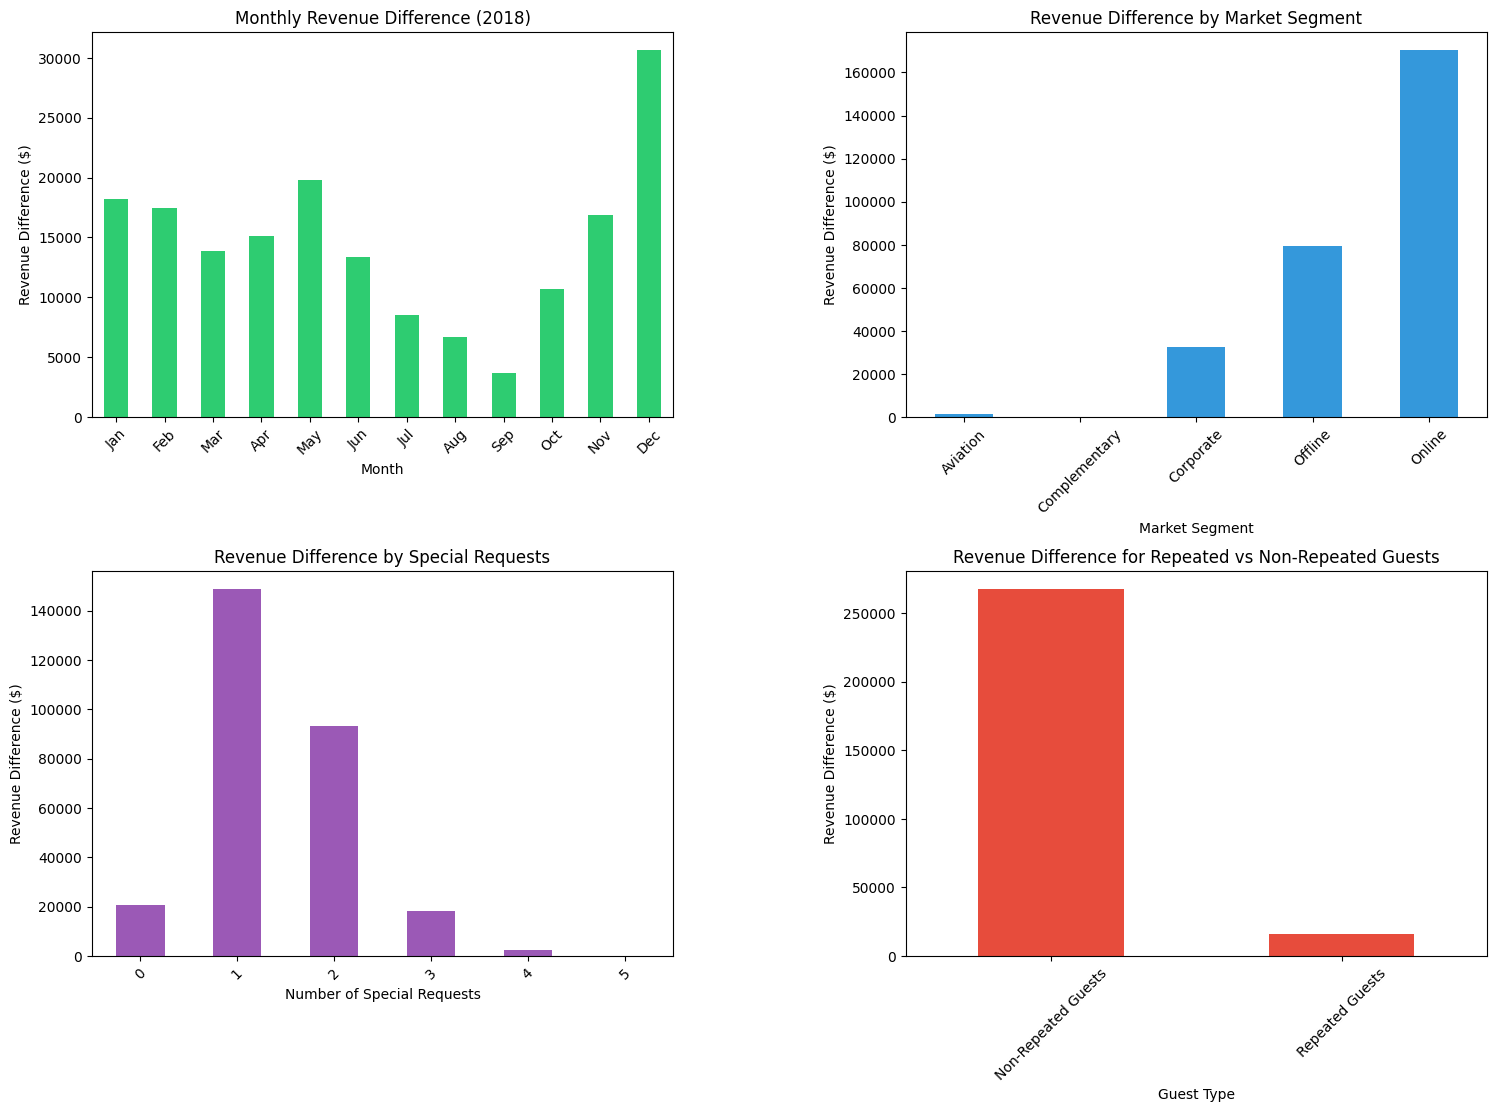

In [81]:

# Step 3: Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot 1: Monthly Revenue Diff for 2018 (Bar Plot)
monthly_revenue_diff_2018.plot(kind='bar', color="#2ecc71", ax=axes[0, 0])
axes[0, 0].set_title("Monthly Revenue Difference (2018)")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Revenue Difference ($)")
axes[0, 0].set_xticks(range(12))
axes[0, 0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)

# Plot 2: Revenue Diff by Market Segment (Bar Plot)
revenue_diff_by_segment.plot(kind='bar', color="#3498db", ax=axes[0, 1])
axes[0, 1].set_title("Revenue Difference by Market Segment")
axes[0, 1].set_xlabel("Market Segment")
axes[0, 1].set_ylabel("Revenue Difference ($)")
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plot 3: Revenue Diff by Special Requests (Bar Plot)
revenue_diff_by_requests.plot(kind='bar', color="#9b59b6", ax=axes[1, 0])
axes[1, 0].set_title("Revenue Difference by Special Requests")
axes[1, 0].set_xlabel("Number of Special Requests")
axes[1, 0].set_ylabel("Revenue Difference ($)")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Plot 4: Revenue Diff for Repeated vs. Non-Repeated Guests (Bar Plot)
revenue_diff_by_repeated_guests.index = ["Non-Repeated Guests", "Repeated Guests"]
revenue_diff_by_repeated_guests.plot(kind='bar', color="#e74c3c", ax=axes[1, 1])
axes[1, 1].set_title("Revenue Difference for Repeated vs Non-Repeated Guests")
axes[1, 1].set_xlabel("Guest Type")
axes[1, 1].set_ylabel("Revenue Difference ($)")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.show()


- There is a significant positive revenue difference in October, September, and June, indicating these are high-performing months with substantial net revenue.

-  Months like July, November, and December show lower revenue differences, with July nearly approaching a break-even point.

-  This segment generates the highest revenue difference despite significant potential revenue loss from cancellations. It’s the most profitable segment overall but requires careful management to mitigate losses. (revenue value not percentage)

-  The Corporate and Offline segments show moderate but stable revenue differences. Corporate bookings, in particular, demonstrate a strong revenue contribution with lower losses, suggesting reliability in this segment.

-  Repeated guests contribute a smaller but more stable revenue difference, with fewer cancellations impacting revenue. This indicates a loyal customer base that is likely to rebook, offering a reliable revenue stream.

# Booking Status (Cancellations etc.)
### This will have redundant and repetitive charts, but all focused in one place

In [82]:

total_bookings = len(df)
cancellations = df['booking_status'].value_counts().get('Canceled', 0)
cancellation_rate = (cancellations / total_bookings) * 100

 
monthly_cancellations = df_2018[df_2018['booking_status'] == 'Canceled'].groupby('arrival_month').size()
total_bookings_per_month = df_2018.groupby('arrival_month').size()
monthly_cancellation_rate = (monthly_cancellations / total_bookings_per_month) * 100

lead_time_cancelled = df[df['booking_status'] == 'Canceled']['lead_time'].mean()
lead_time_not_cancelled = df[df['booking_status'] != 'Canceled']['lead_time'].mean()

special_requests_cancelled = df[df['booking_status'] == 'Canceled']['no_of_special_requests'].mean()
special_requests_not_cancelled = df[df['booking_status'] != 'Canceled']['no_of_special_requests'].mean()

cancellations_over_time = df_2018[df_2018['booking_status'] == 'Canceled'].groupby(['arrival_year', 'arrival_month']).size()
total_bookings_over_time = df_2018.groupby(['arrival_year', 'arrival_month']).size()
cancellation_rate_over_time = (cancellations_over_time / total_bookings_over_time) * 100

avg_price_cancelled = df[df['booking_status'] == 'Canceled']['avg_price_per_room'].mean()
avg_price_not_cancelled = df[df['booking_status'] != 'Canceled']['avg_price_per_room'].mean()

cancellation_analysis_summary = {
    "Overall Cancellation Rate (%)": cancellation_rate,
    "Monthly Cancellation Rate (%)": monthly_cancellation_rate,
    "Lead Time - Cancelled (Days)": lead_time_cancelled,
    "Lead Time - Not Cancelled (Days)": lead_time_not_cancelled,
    "Avg Special Requests - Cancelled": special_requests_cancelled,
    "Avg Special Requests - Not Cancelled": special_requests_not_cancelled,
    "Cancellation Rate Over Time (%)": cancellation_rate_over_time,
    "Avg Price - Cancelled Bookings": avg_price_cancelled,
    "Avg Price - Not Cancelled Bookings": avg_price_not_cancelled,
}

In [83]:
# pprint(cancellation_analysis_summary)

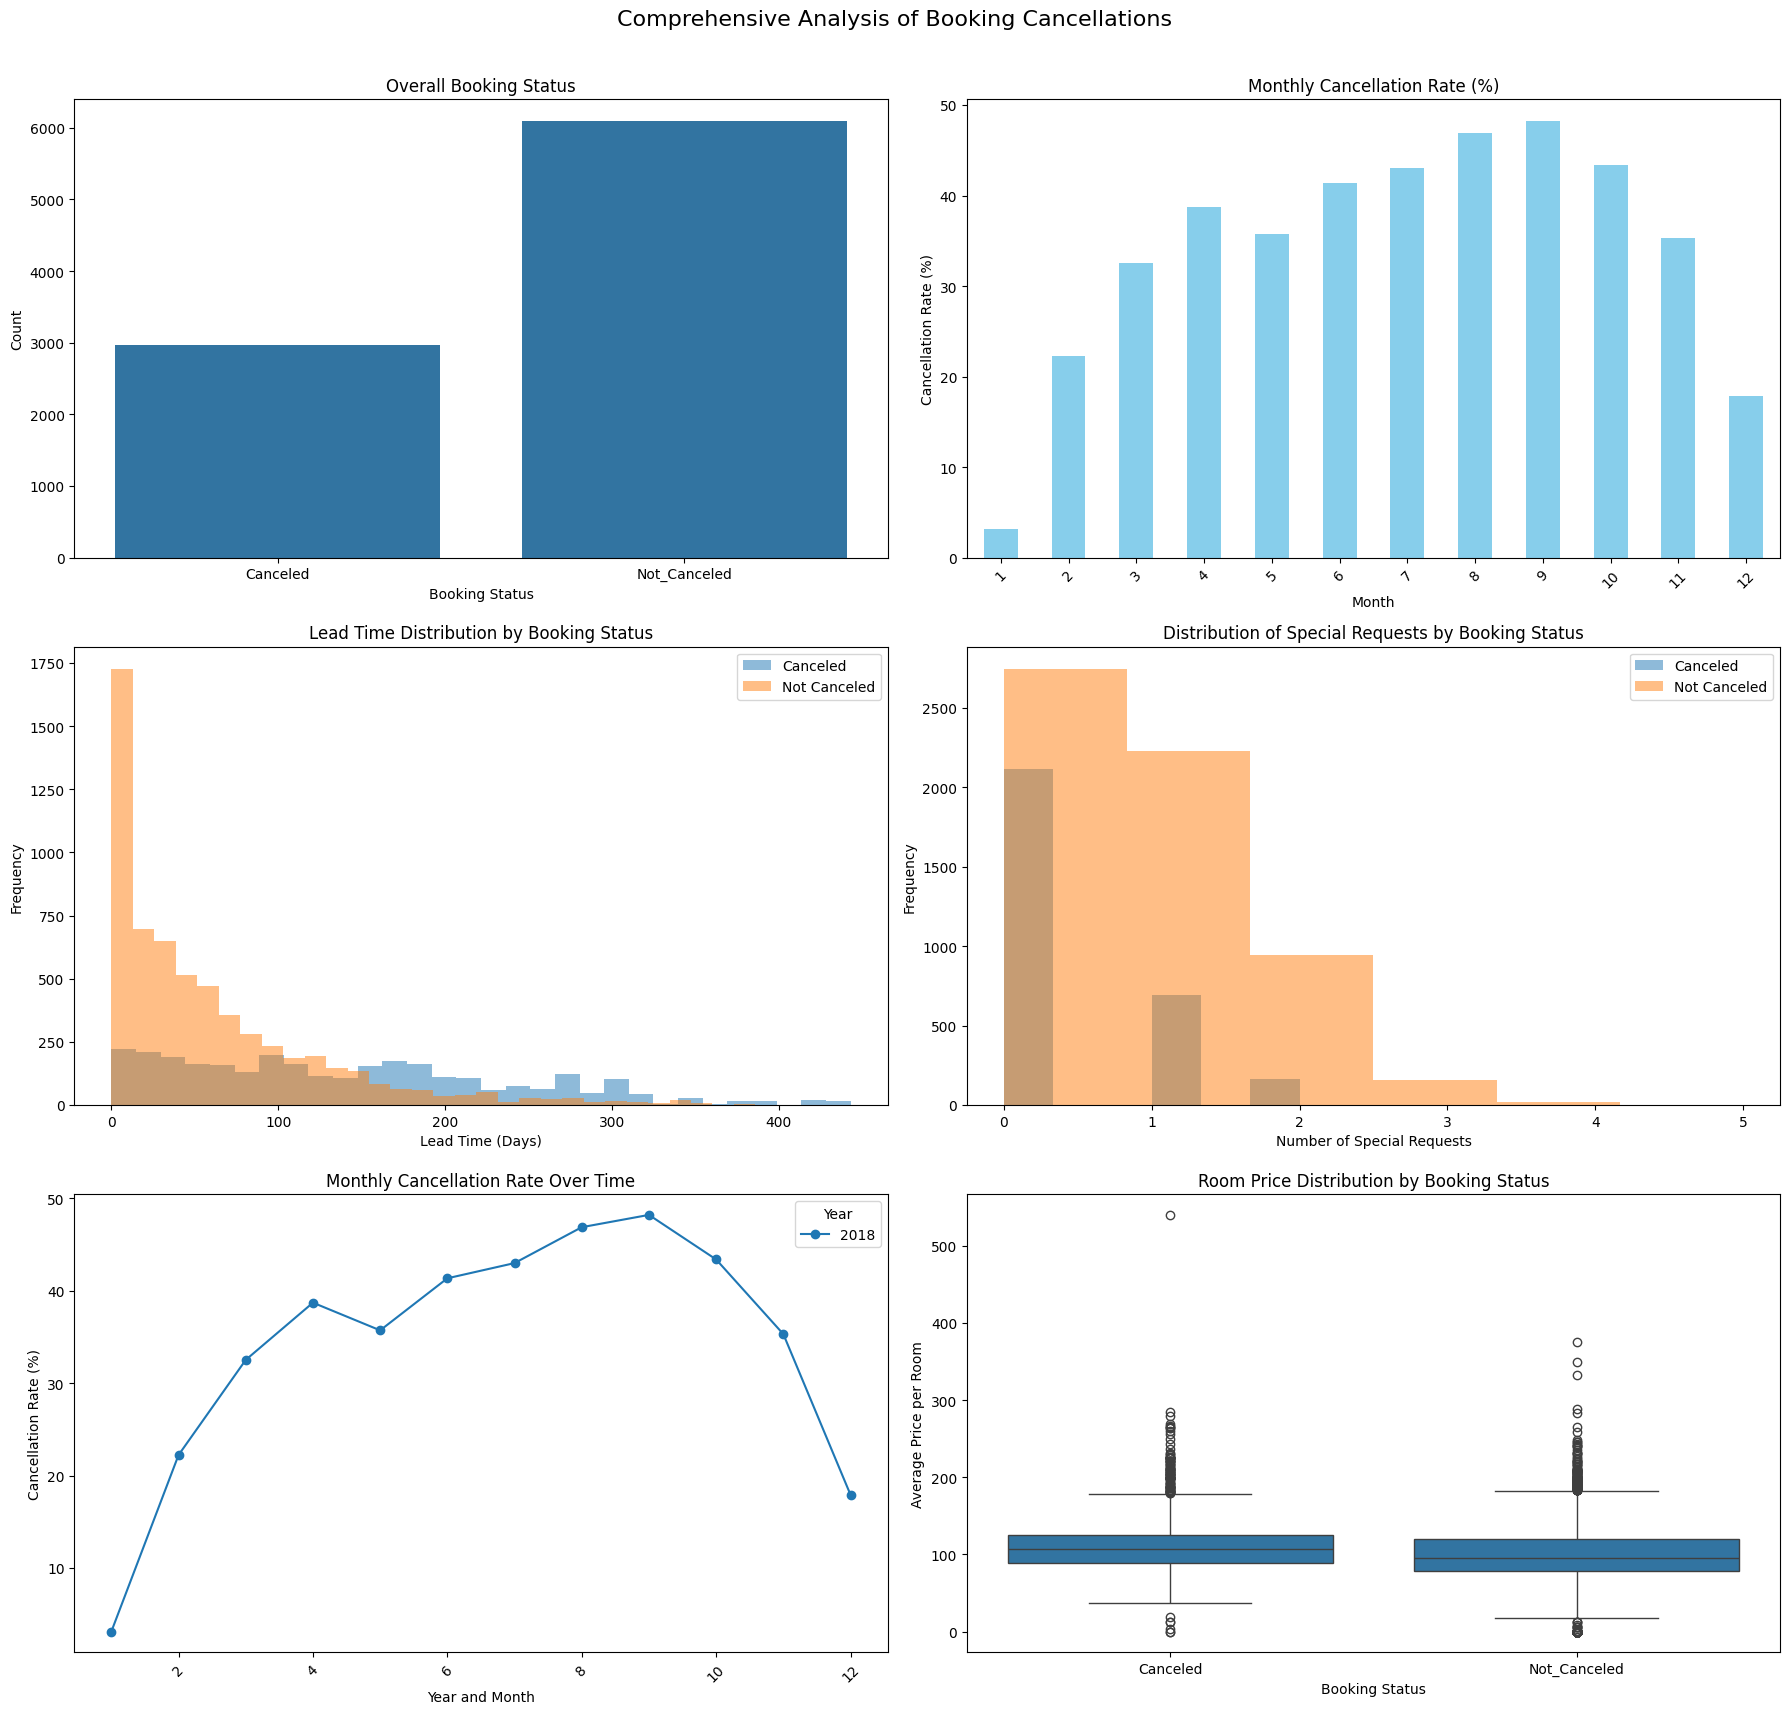

In [84]:
# Combining all visualizations into a single figure with subplots

fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Comprehensive Analysis of Booking Cancellations', fontsize=16)

# 1. Overall Booking Status Count Plot
sns.countplot(data=df, x='booking_status', ax=axes[0, 0])
axes[0, 0].set_title('Overall Booking Status')
axes[0, 0].set_xlabel('Booking Status')
axes[0, 0].set_ylabel('Count')

# 2. Monthly Cancellation Rate Bar Plot
monthly_cancellation_rate.plot(kind='bar', color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Monthly Cancellation Rate (%)')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Cancellation Rate (%)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Lead Time Analysis for Cancellations (Histogram)
axes[1, 0].hist(df.loc[df['booking_status'] == 'Canceled', 'lead_time'].dropna(), bins=30, alpha=0.5, label='Canceled')
axes[1, 0].hist(df.loc[df['booking_status'] != 'Canceled', 'lead_time'].dropna(), bins=30, alpha=0.5, label='Not Canceled')
axes[1, 0].set_title('Lead Time Distribution by Booking Status')
axes[1, 0].set_xlabel('Lead Time (Days)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# 4. Influence of Special Requests on Cancellations (Histogram)
axes[1, 1].hist(df.loc[df['booking_status'] == 'Canceled', 'no_of_special_requests'].dropna(), bins=6, alpha=0.5, label='Canceled')
axes[1, 1].hist(df.loc[df['booking_status'] != 'Canceled', 'no_of_special_requests'].dropna(), bins=6, alpha=0.5, label='Not Canceled')
axes[1, 1].set_title('Distribution of Special Requests by Booking Status')
axes[1, 1].set_xlabel('Number of Special Requests')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# 5. Cancellation Trends Over Time Line Plot
cancellation_rate_over_time.unstack(level=0).plot(kind='line', marker='o', ax=axes[2, 0])
axes[2, 0].set_title('Monthly Cancellation Rate Over Time')
axes[2, 0].set_xlabel('Year and Month')
axes[2, 0].set_ylabel('Cancellation Rate (%)')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].legend(title='Year')

# 6. Revenue Impact of Cancellations (Box Plot)
sns.boxplot(data=df, x='booking_status', y='avg_price_per_room', ax=axes[2, 1])
axes[2, 1].set_title('Room Price Distribution by Booking Status')
axes[2, 1].set_xlabel('Booking Status')
axes[2, 1].set_ylabel('Average Price per Room')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to fit title and labels
plt.show()


- The overall cancellation rate is around 32.8%, indicating that nearly one-third of bookings are canceled.

-  The cancellation rate peaks between June and September, with the highest rate in July (45.6%). Conversely, December and January have significantly lower cancellation rates (around 3-13%).

- Canceled bookings have an average lead time of approximately 140 days, which is considerably longer than the 58 days for non-canceled bookings.

- Non-canceled bookings exhibit a higher frequency of special requests (average of 0.77 requests) compared to canceled bookings (average of 0.34 requests).


# This is the end of the generic EDA, the following notebooks will answer more specific questions from the slides deck provided

In [85]:
print("Rain of Ashes")

Rain of Ashes
